## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import cufflinks as cf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from  matplotlib.ticker import FuncFormatter
from plotly.offline import init_notebook_mode, plot, iplot

In [3]:
# Configurando cufflinks
init_notebook_mode(connected=True)
cf.go_offline()

# Carregando DataSets

In [4]:
ocorrencia_df = pd.read_csv('../DataSets/polished/ocorrencia.csv')
ocorrencia_tipo_df = pd.read_csv('../DataSets/polished/ocorrencia_tipo.csv')
aeronave_df = pd.read_csv('../DataSets/polished/aeronave.csv')
fator_contribuinte_df = pd.read_csv('../DataSets/polished/fator_contribuinte.csv')
recomendacao_df = pd.read_csv('../DataSets/polished/recomendacao.csv')

cenipa1 = pd.read_csv('../DataSets/merged/CENIPA1.csv')
cenipa_df = pd.read_csv('../DataSets/merged/CENIPA_DF.csv')

---------------------------------

# Funções de suporte

Função para transformar valores de String em int no estilo "sparse"

In [5]:
def make_int(col):
    if col.dtype == 'object': # Verifica se a coluna é de string (ou DateTime)
        col = col.replace(np.nan,'null') # Transforma nans em string para serem mapeados
        c_map = col.map({k: i for i, k in enumerate(np.unique(col))}) # Mapeia os valores
        c_map['null'] = np.nan # Destransforma os nulls
        return c_map
    return col

-------------

# Ocorrencia

Ajustando valores das colunas para análise.  

In [6]:
ocorrencia_df = ocorrencia_df.drop(columns=['codigo_ocorrencia',
                                           'codigo_ocorrencia1',
                                           'codigo_ocorrencia2',
                                           'codigo_ocorrencia3',
                                           'codigo_ocorrencia4'])

In [7]:
i_ocorrencia = ocorrencia_df.apply(make_int, axis=0) # DF com valores numéricos apenas

## Matriz de correlação entre as variáveis de ocorrência

<AxesSubplot:>

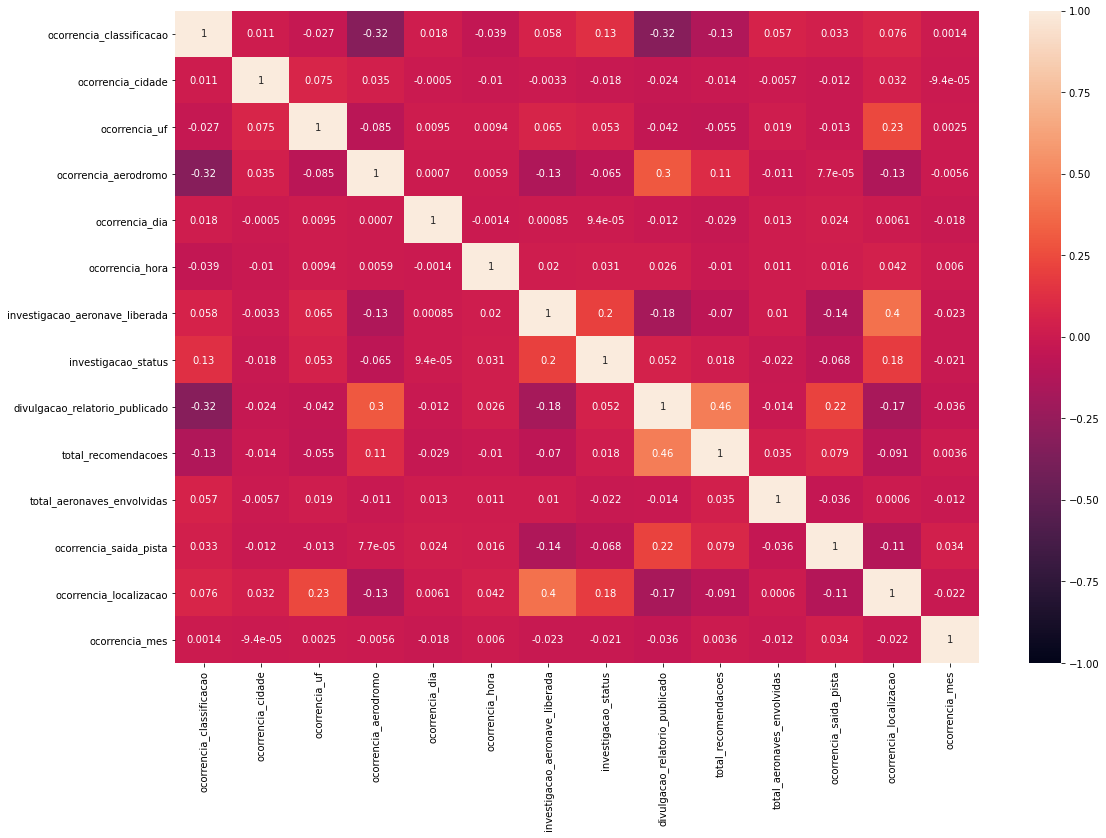

In [8]:
plt.figure(figsize=(18,12))
sns.heatmap(i_ocorrencia.corr(), vmin=-1, vmax=1, robust=True, annot=True)

## Sazonalidade na categoria de ocorrência

### 1. Mensal

Text(0, 0.5, 'Quantidade de ocorrências')

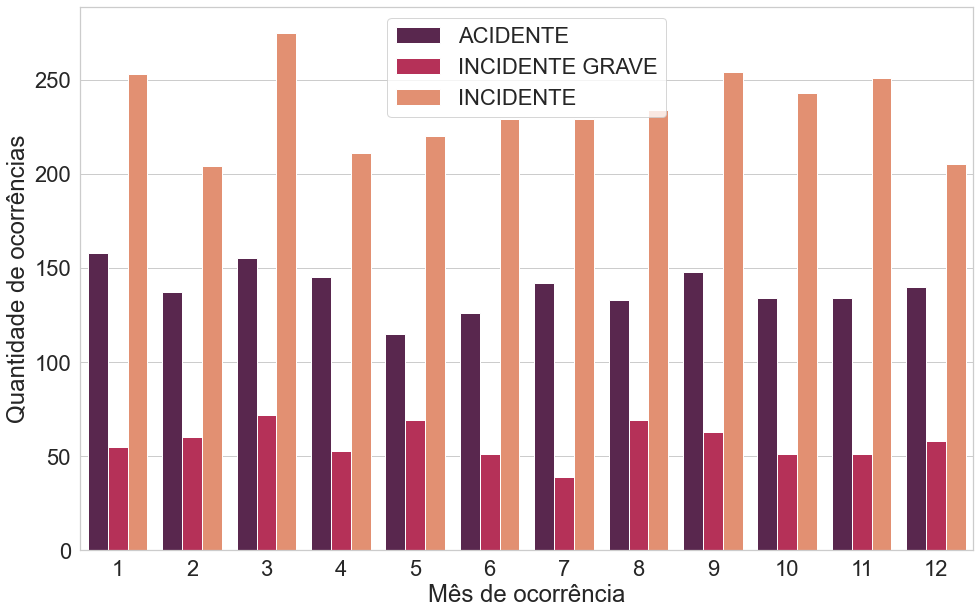

In [9]:
plt.figure(figsize=(16,10))
sns.set(font_scale=2)
sns.set_style('whitegrid')
sns.countplot(data=ocorrencia_df.sort_values(by='ocorrencia_mes', ascending=True),
hue='ocorrencia_classificacao', x='ocorrencia_mes', palette='rocket', hue_order=['ACIDENTE',
                                                                                 'INCIDENTE GRAVE',
                                                                                 'INCIDENTE'])
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)+1))
plt.legend(loc='upper center')
plt.xlabel('Mês de ocorrência')
plt.ylabel('Quantidade de ocorrências')

### 2. Por dia

Text(0, 0.5, 'Quantidade de ocorrências')

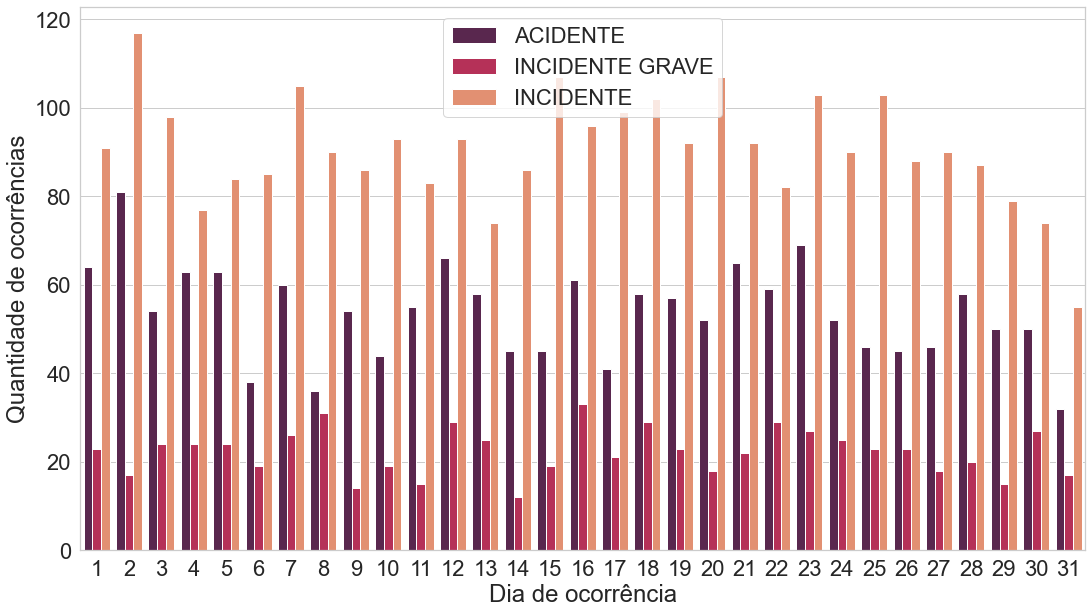

In [10]:
plt.figure(figsize=(18,10))
sns.set(font_scale=2)
sns.set_style('whitegrid')
sns.countplot(data=ocorrencia_df.sort_values(by='ocorrencia_dia', ascending=True),
hue='ocorrencia_classificacao', x='ocorrencia_dia', palette='rocket', hue_order=['ACIDENTE',
                                                                                 'INCIDENTE GRAVE',
                                                                                 'INCIDENTE'])
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)+1))
plt.legend(loc='upper center')
plt.xlabel('Dia de ocorrência')
plt.ylabel('Quantidade de ocorrências')

### 3. Por hora

Text(0, 0.5, 'Quantidade de ocorrências')

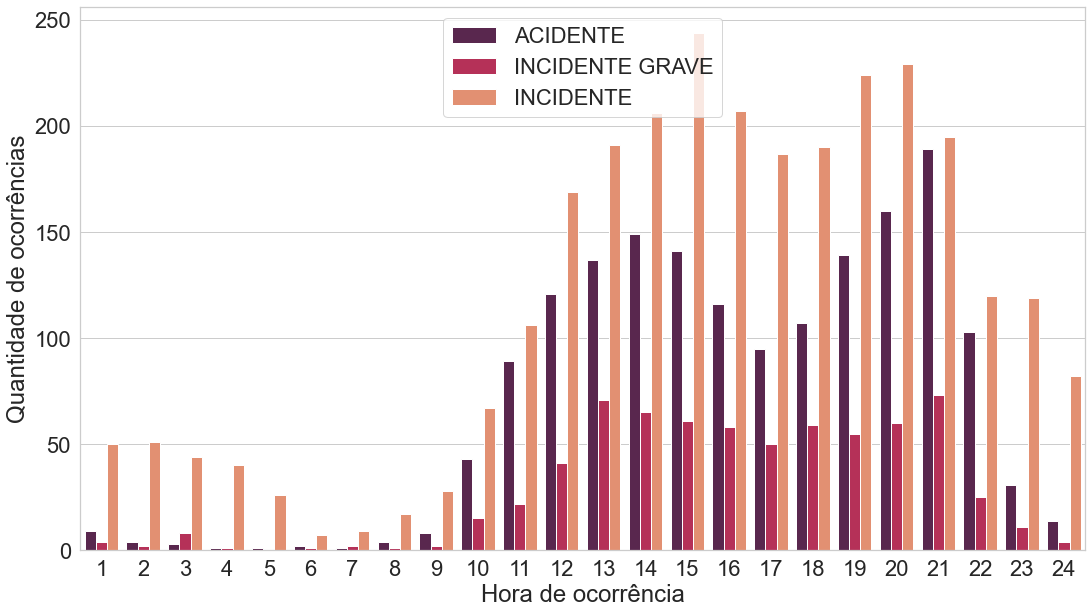

In [11]:
plt.figure(figsize=(18,10))
sns.set(font_scale=2)
sns.set_style('whitegrid')
sns.countplot(data=ocorrencia_df.sort_values(by='ocorrencia_hora', ascending=True),
hue='ocorrencia_classificacao', x='ocorrencia_hora', palette='rocket', hue_order=['ACIDENTE',
                                                                                 'INCIDENTE GRAVE',
                                                                                 'INCIDENTE'])
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)+1))
plt.legend(loc='upper center')
plt.xlabel('Hora de ocorrência')
plt.ylabel('Quantidade de ocorrências')

## Quantidade de recomendações relacionada com a gravidade

Text(0, 0.5, 'Quantidade de ocorrências')

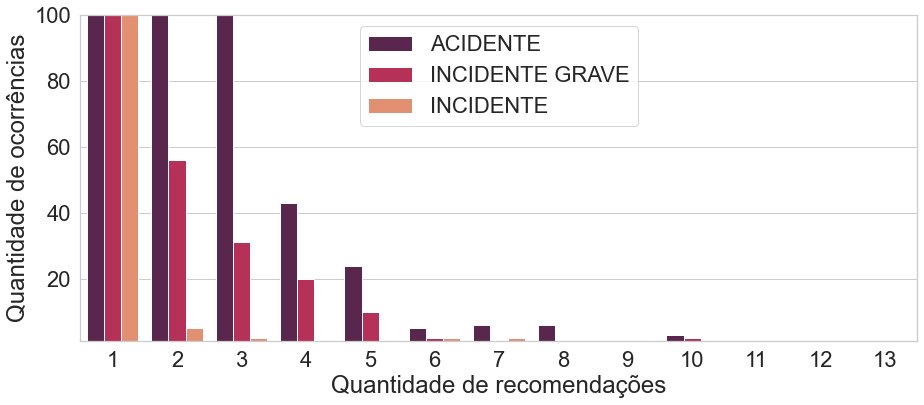

In [12]:
fig, ax = plt.subplots()
ax.set_ylim(1,100)
fig.set_size_inches(15,6)

sns.set(font_scale=2)
sns.set_style('whitegrid')
sns.countplot(data=ocorrencia_df.sort_values(by='total_recomendacoes', ascending=True),
hue='ocorrencia_classificacao', x='total_recomendacoes', palette='rocket', hue_order=['ACIDENTE',
                                                                                 'INCIDENTE GRAVE',
                                                                                 'INCIDENTE'], ax=ax)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)+1))
plt.legend(loc='upper center')
plt.xlabel('Quantidade de recomendações')
plt.ylabel('Quantidade de ocorrências')

## Range das variáveis numéricas

In [13]:
i_ocorrencia[['ocorrencia_dia',
             'ocorrencia_hora',
             'total_recomendacoes',
             'total_aeronaves_envolvidas',
             'ocorrencia_mes']].iplot(kind='box')

## Countplots e Histogramas
Countplots e histogramas nos ajudam a entender a distribuição dos dados em cada coluna.  
Vamos plotar os principais e mais informativos. Mais countplots podem ser encontrados nos **Profilings**!

### Classificação

<AxesSubplot:xlabel='ocorrencia_classificacao', ylabel='count'>

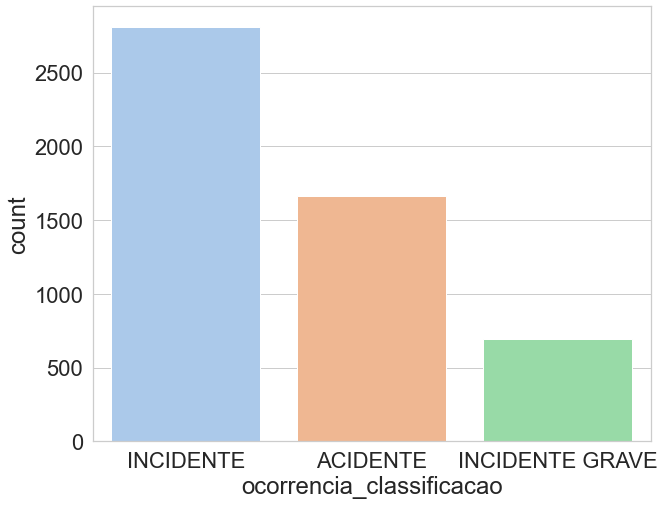

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(data=ocorrencia_df, x='ocorrencia_classificacao', palette='pastel')

### Localização

Localizações mais populares para ocorrências. Provavelmente tem a ver com aeródramos comuns.

<AxesSubplot:xlabel='ocorrencia_localizacao', ylabel='count'>

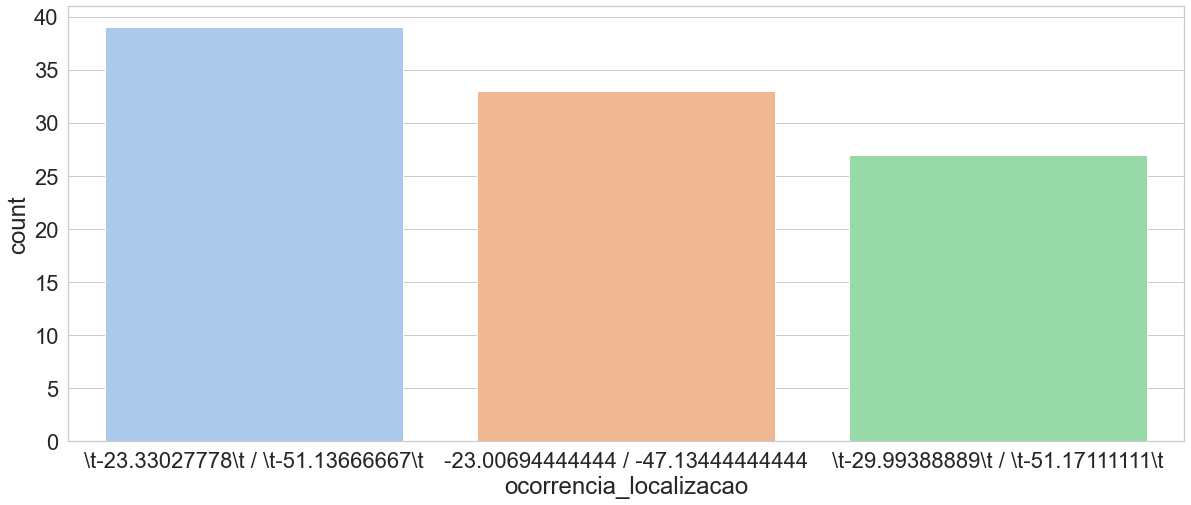

In [15]:
plt.figure(figsize=(20,8))
sns.countplot(data=ocorrencia_df,
              x='ocorrencia_localizacao',
              order=ocorrencia_df.ocorrencia_localizacao.value_counts().iloc[:3].index,
              palette='pastel')

### Estado / UF

<AxesSubplot:xlabel='ocorrencia_uf', ylabel='count'>

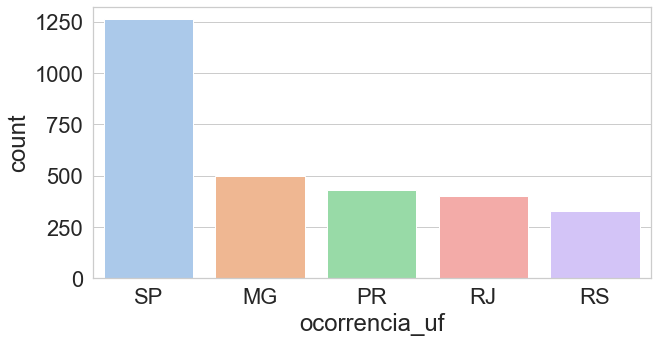

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=ocorrencia_df,
              x='ocorrencia_uf',
              order=ocorrencia_df.ocorrencia_uf.value_counts().iloc[:5].index,
              palette='pastel')

### Cidade

<AxesSubplot:xlabel='ocorrencia_cidade', ylabel='count'>

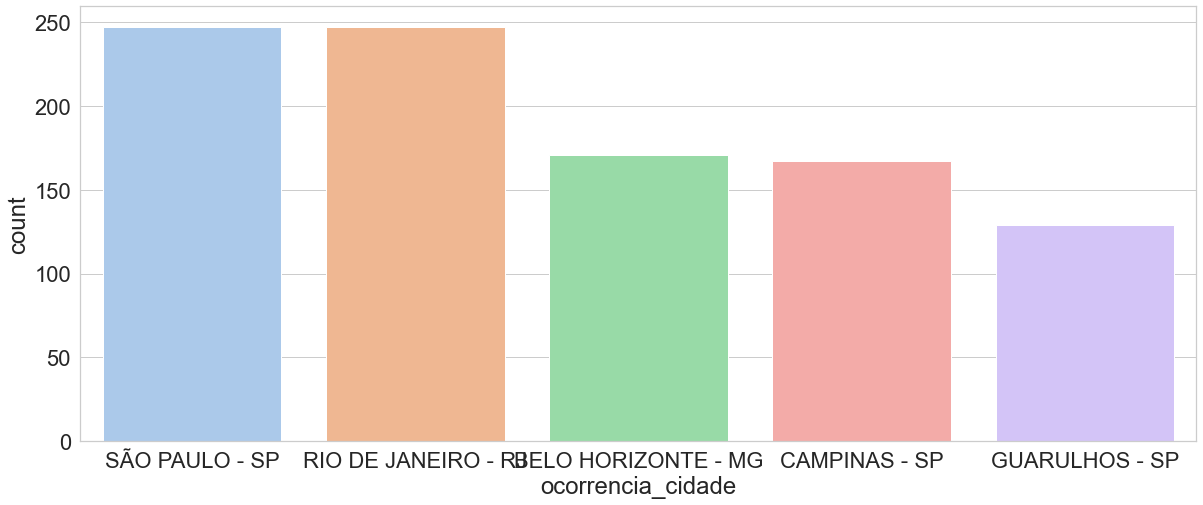

In [17]:
plt.figure(figsize=(20,8))
sns.countplot(data=ocorrencia_df,
              x='ocorrencia_cidade',
              order=ocorrencia_df.ocorrencia_cidade.value_counts().iloc[:5].index,
              palette='pastel')

### Aerodromos

<AxesSubplot:xlabel='ocorrencia_aerodromo', ylabel='count'>

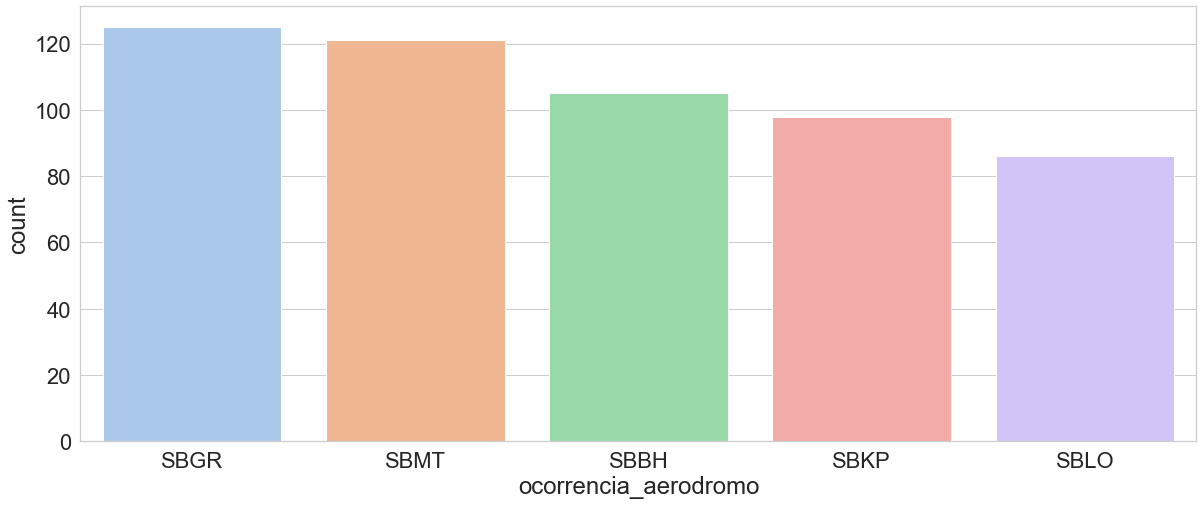

In [18]:
plt.figure(figsize=(20,8))
sns.countplot(data=ocorrencia_df,
              x='ocorrencia_aerodromo',
              order=ocorrencia_df.ocorrencia_aerodromo.value_counts().iloc[:5].index,
              palette='pastel')

### Publicação de Relatório

<AxesSubplot:xlabel='investigacao_aeronave_liberada', ylabel='count'>

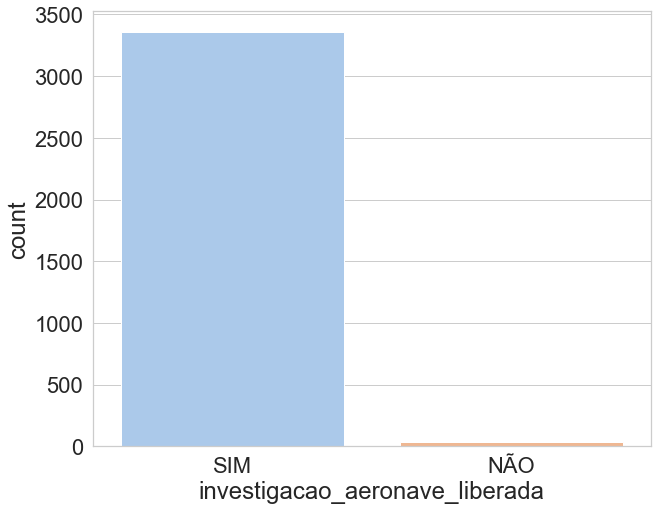

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(data=ocorrencia_df, x='investigacao_aeronave_liberada', palette='pastel')

<AxesSubplot:xlabel='divulgacao_relatorio_publicado', ylabel='count'>

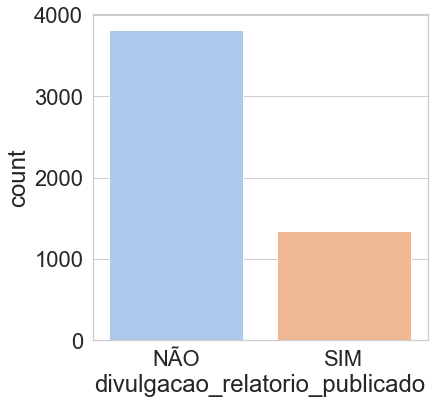

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(data=ocorrencia_df, x='divulgacao_relatorio_publicado', palette='pastel')

### Aeronaves envolvidas

<AxesSubplot:xlabel='total_aeronaves_envolvidas', ylabel='count'>

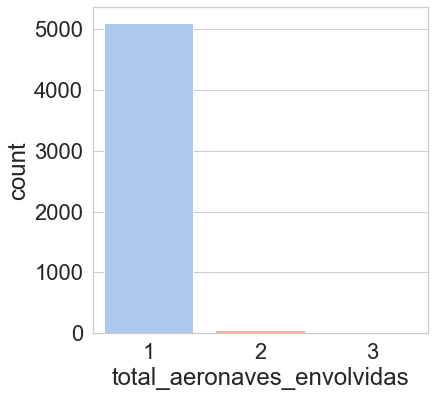

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(data=ocorrencia_df, x='total_aeronaves_envolvidas', palette='pastel')

### Saída da Pista

<AxesSubplot:xlabel='ocorrencia_saida_pista', ylabel='count'>

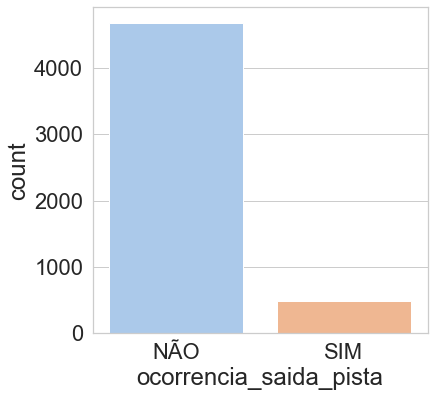

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(data=ocorrencia_df, x='ocorrencia_saida_pista', palette='pastel')

# Tipo de Ocorrência

Ajustando valores das colunas para análise.

In [23]:
ocorrencia_tipo_df = ocorrencia_tipo_df.drop(columns=['codigo_ocorrencia1'])

In [24]:
i_ocorrencia_tipo = ocorrencia_tipo_df.apply(make_int, axis=0) # DF com valores numéricos apenas

## Matriz de correlação entre as variáveis de tipo de ocorrência

<AxesSubplot:>

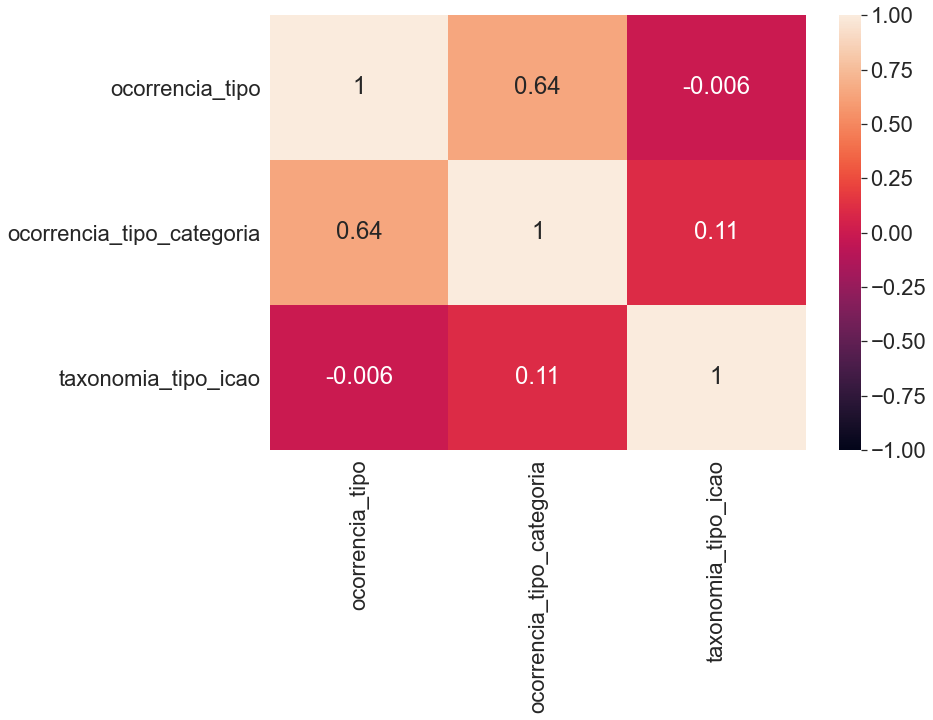

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(i_ocorrencia_tipo.corr(), vmin=-1, vmax=1, robust=True, annot=True)

## Countplots e Histogramas
Countplots e histogramas nos ajudam a entender a distribuição dos dados em cada coluna.  
Vamos plotar os principais e mais informativos. Mais countplots podem ser encontrados nos **Profilings**!

### Tipo da Ocorrência

<AxesSubplot:xlabel='ocorrencia_tipo', ylabel='count'>

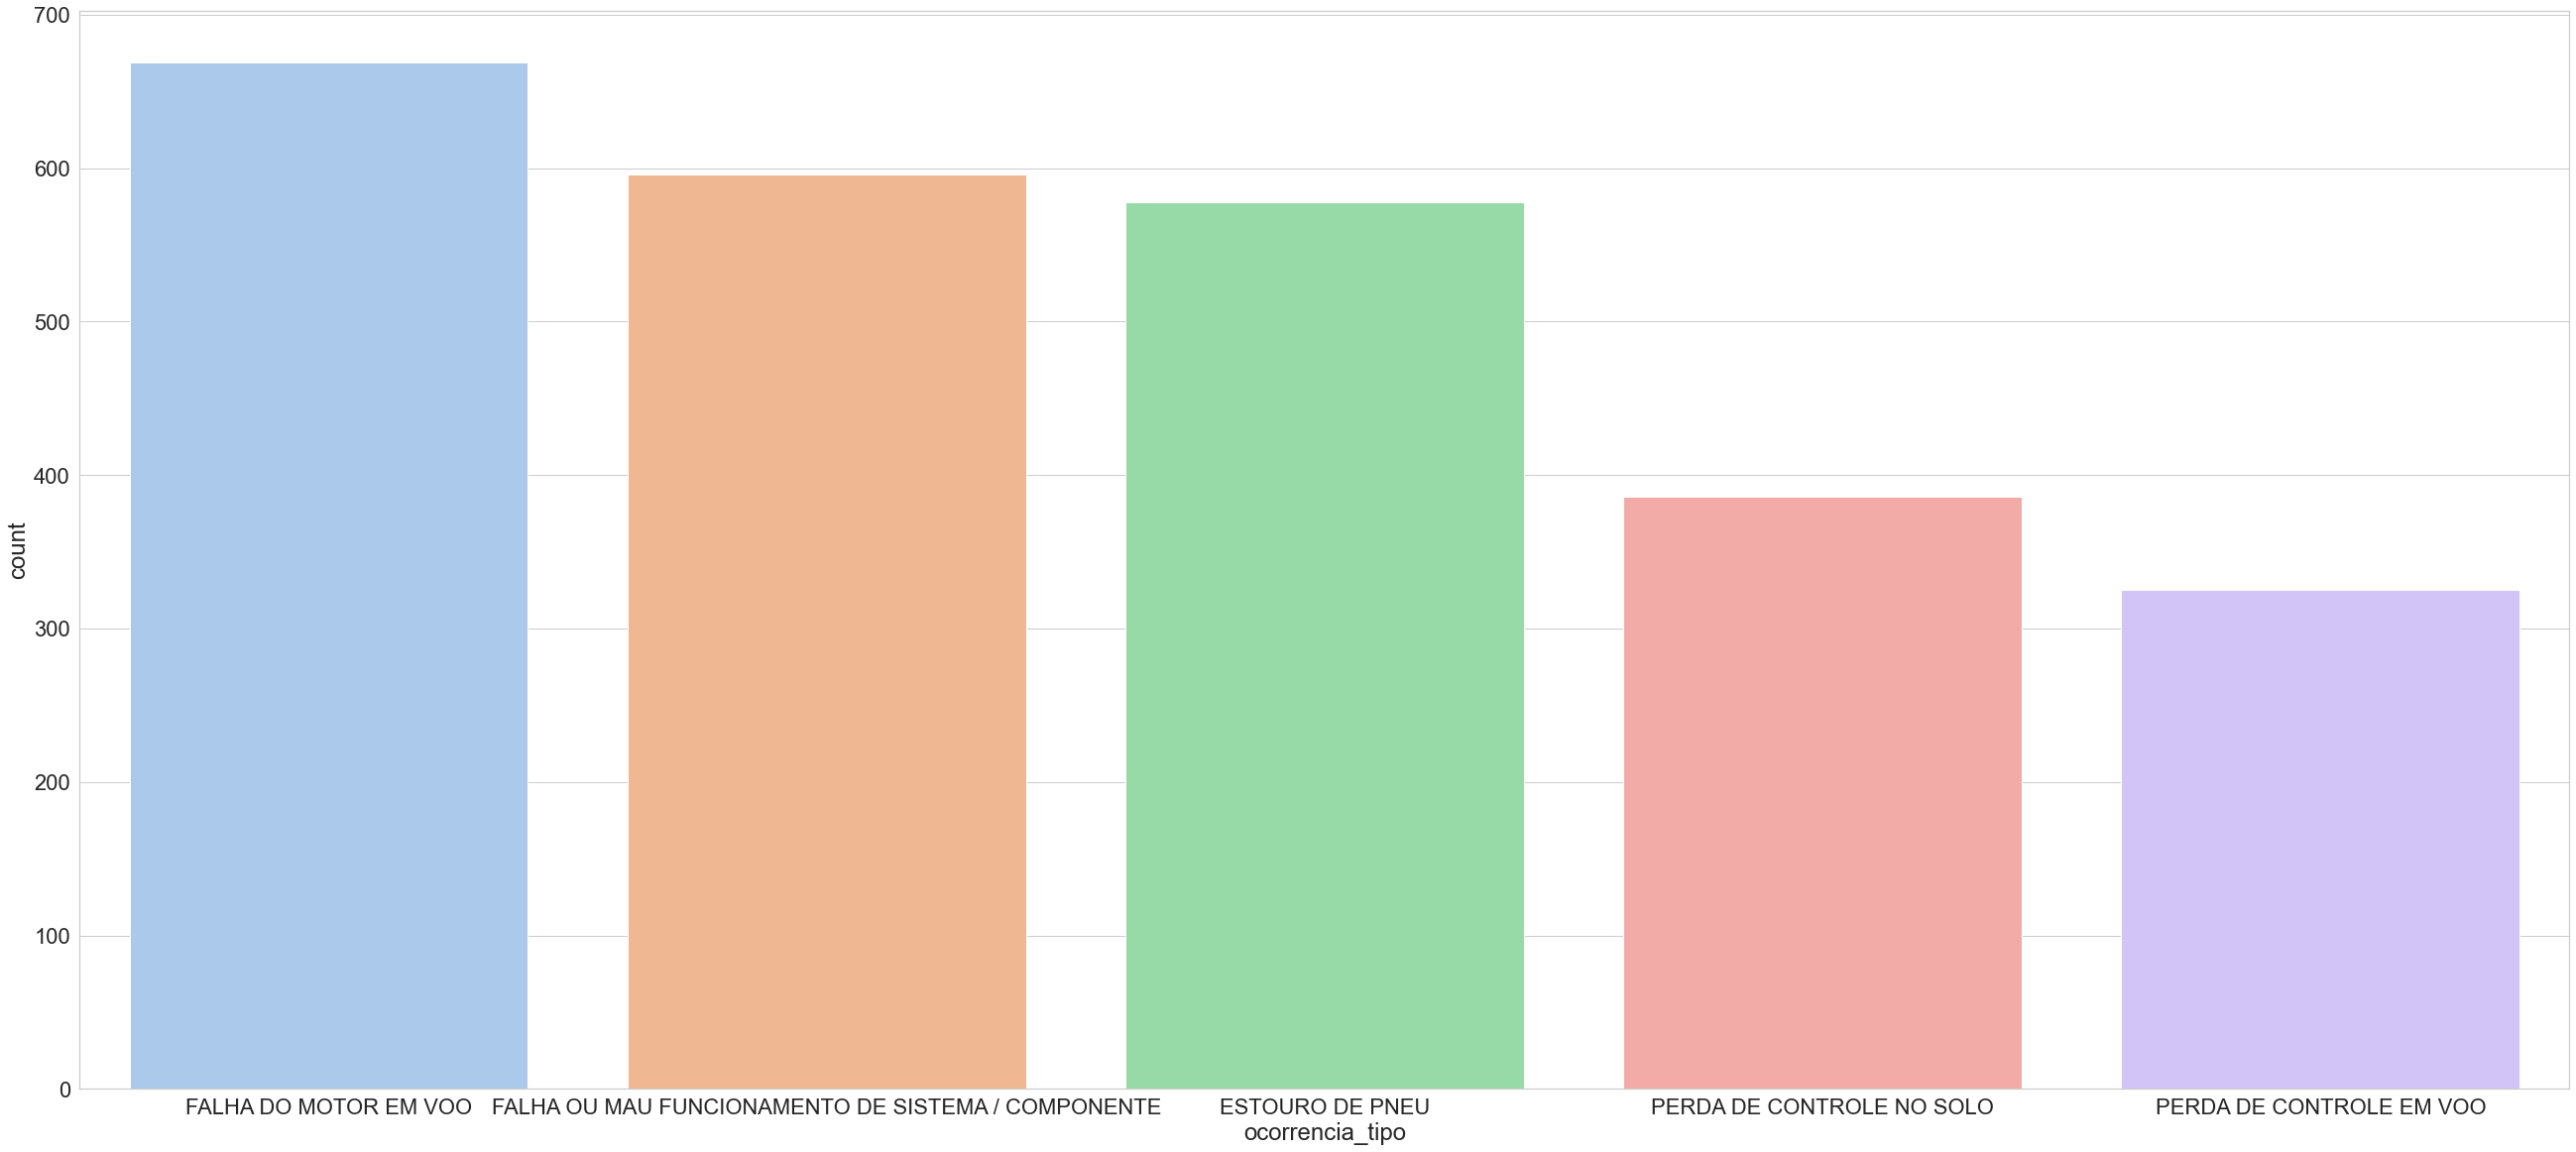

In [26]:
plt.figure(figsize=(45,20))
sns.countplot(data=ocorrencia_tipo_df,
              x='ocorrencia_tipo',
              order=ocorrencia_tipo_df.ocorrencia_tipo.value_counts().iloc[:5].index,
              palette='pastel')

### Categoria do Tipo da Ocorrência

[None, None, None, None, None, None, None, None, None, None]

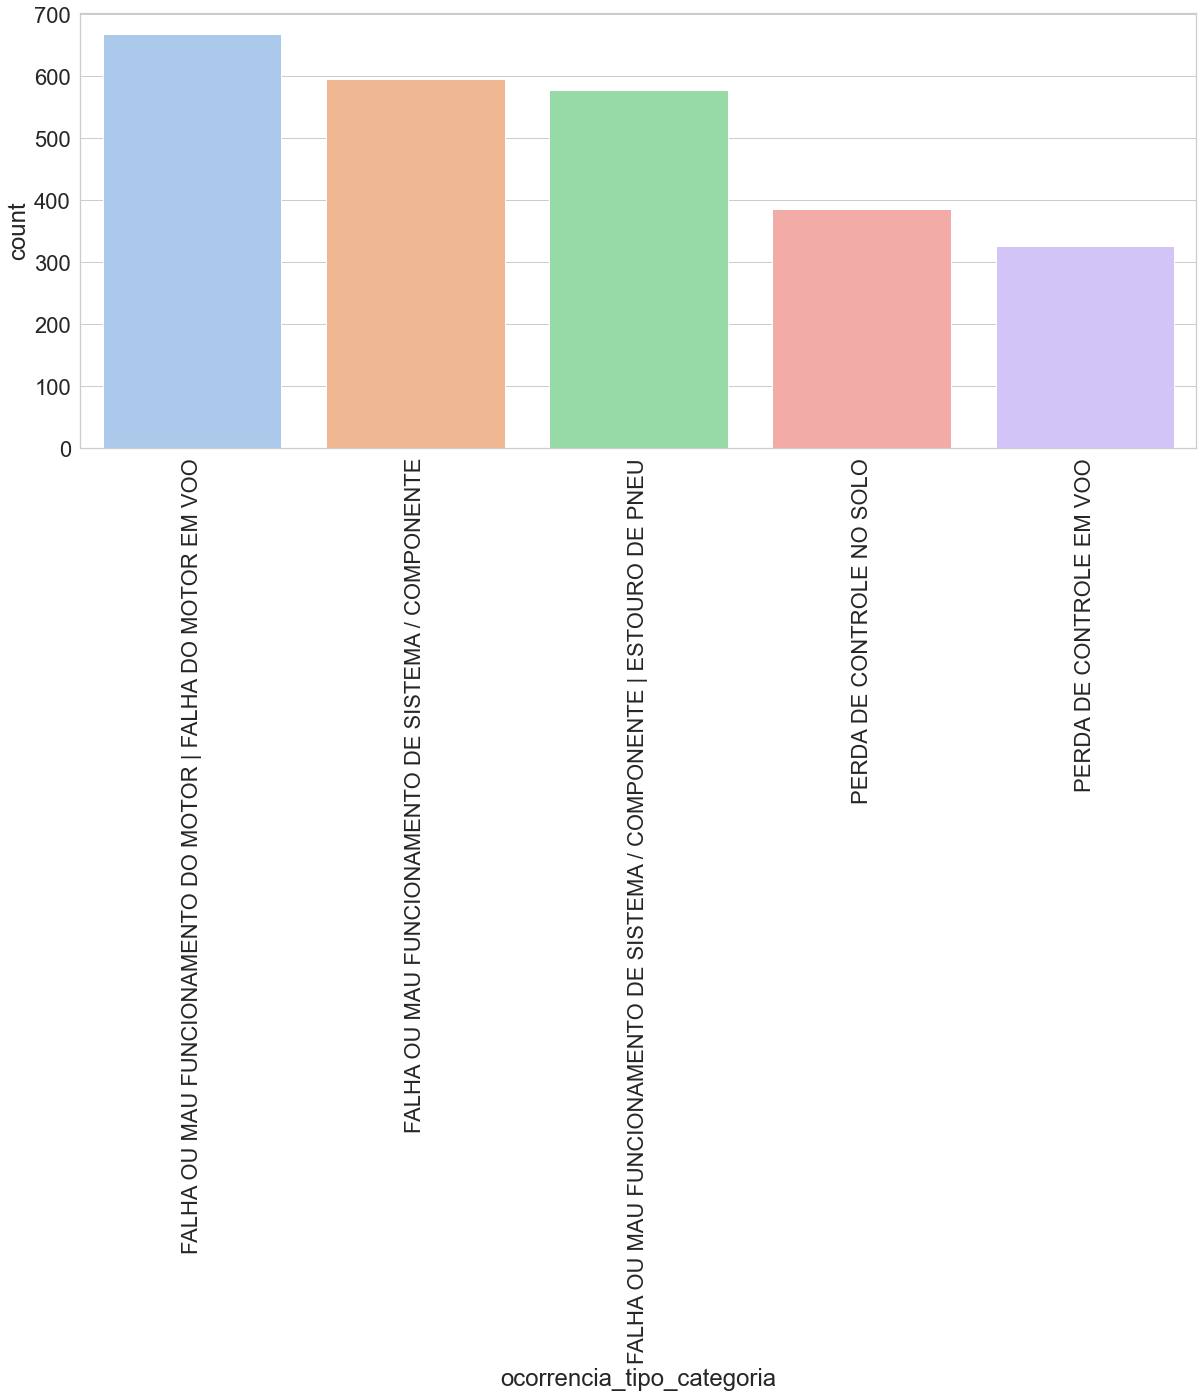

In [27]:
plt.figure(figsize=(20,8))
p=sns.countplot(data=ocorrencia_tipo_df,
              x='ocorrencia_tipo_categoria',
              order=ocorrencia_tipo_df.ocorrencia_tipo_categoria.value_counts().iloc[:5].index,
              palette='pastel')
plt.setp(p.get_xticklabels(), rotation=90)

### Taxonomia tipo icao

<AxesSubplot:xlabel='taxonomia_tipo_icao', ylabel='count'>

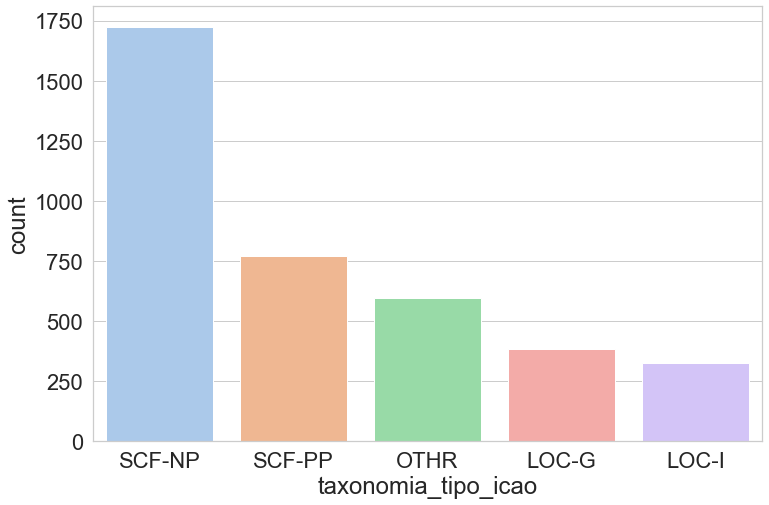

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(data=ocorrencia_tipo_df,
              x='taxonomia_tipo_icao',
              order=ocorrencia_tipo_df.taxonomia_tipo_icao.value_counts().iloc[:5].index,
              palette='pastel')

# Aeronave

Ajustando valores das colunas para análise.

In [29]:
aeronave_df = aeronave_df.drop(columns=['codigo_ocorrencia2'])

In [30]:
i_aeronave = aeronave_df.apply(make_int, axis=0) # DF com valores numéricos apenas

## Matriz de correlação das variáveis de aeronave

<AxesSubplot:>

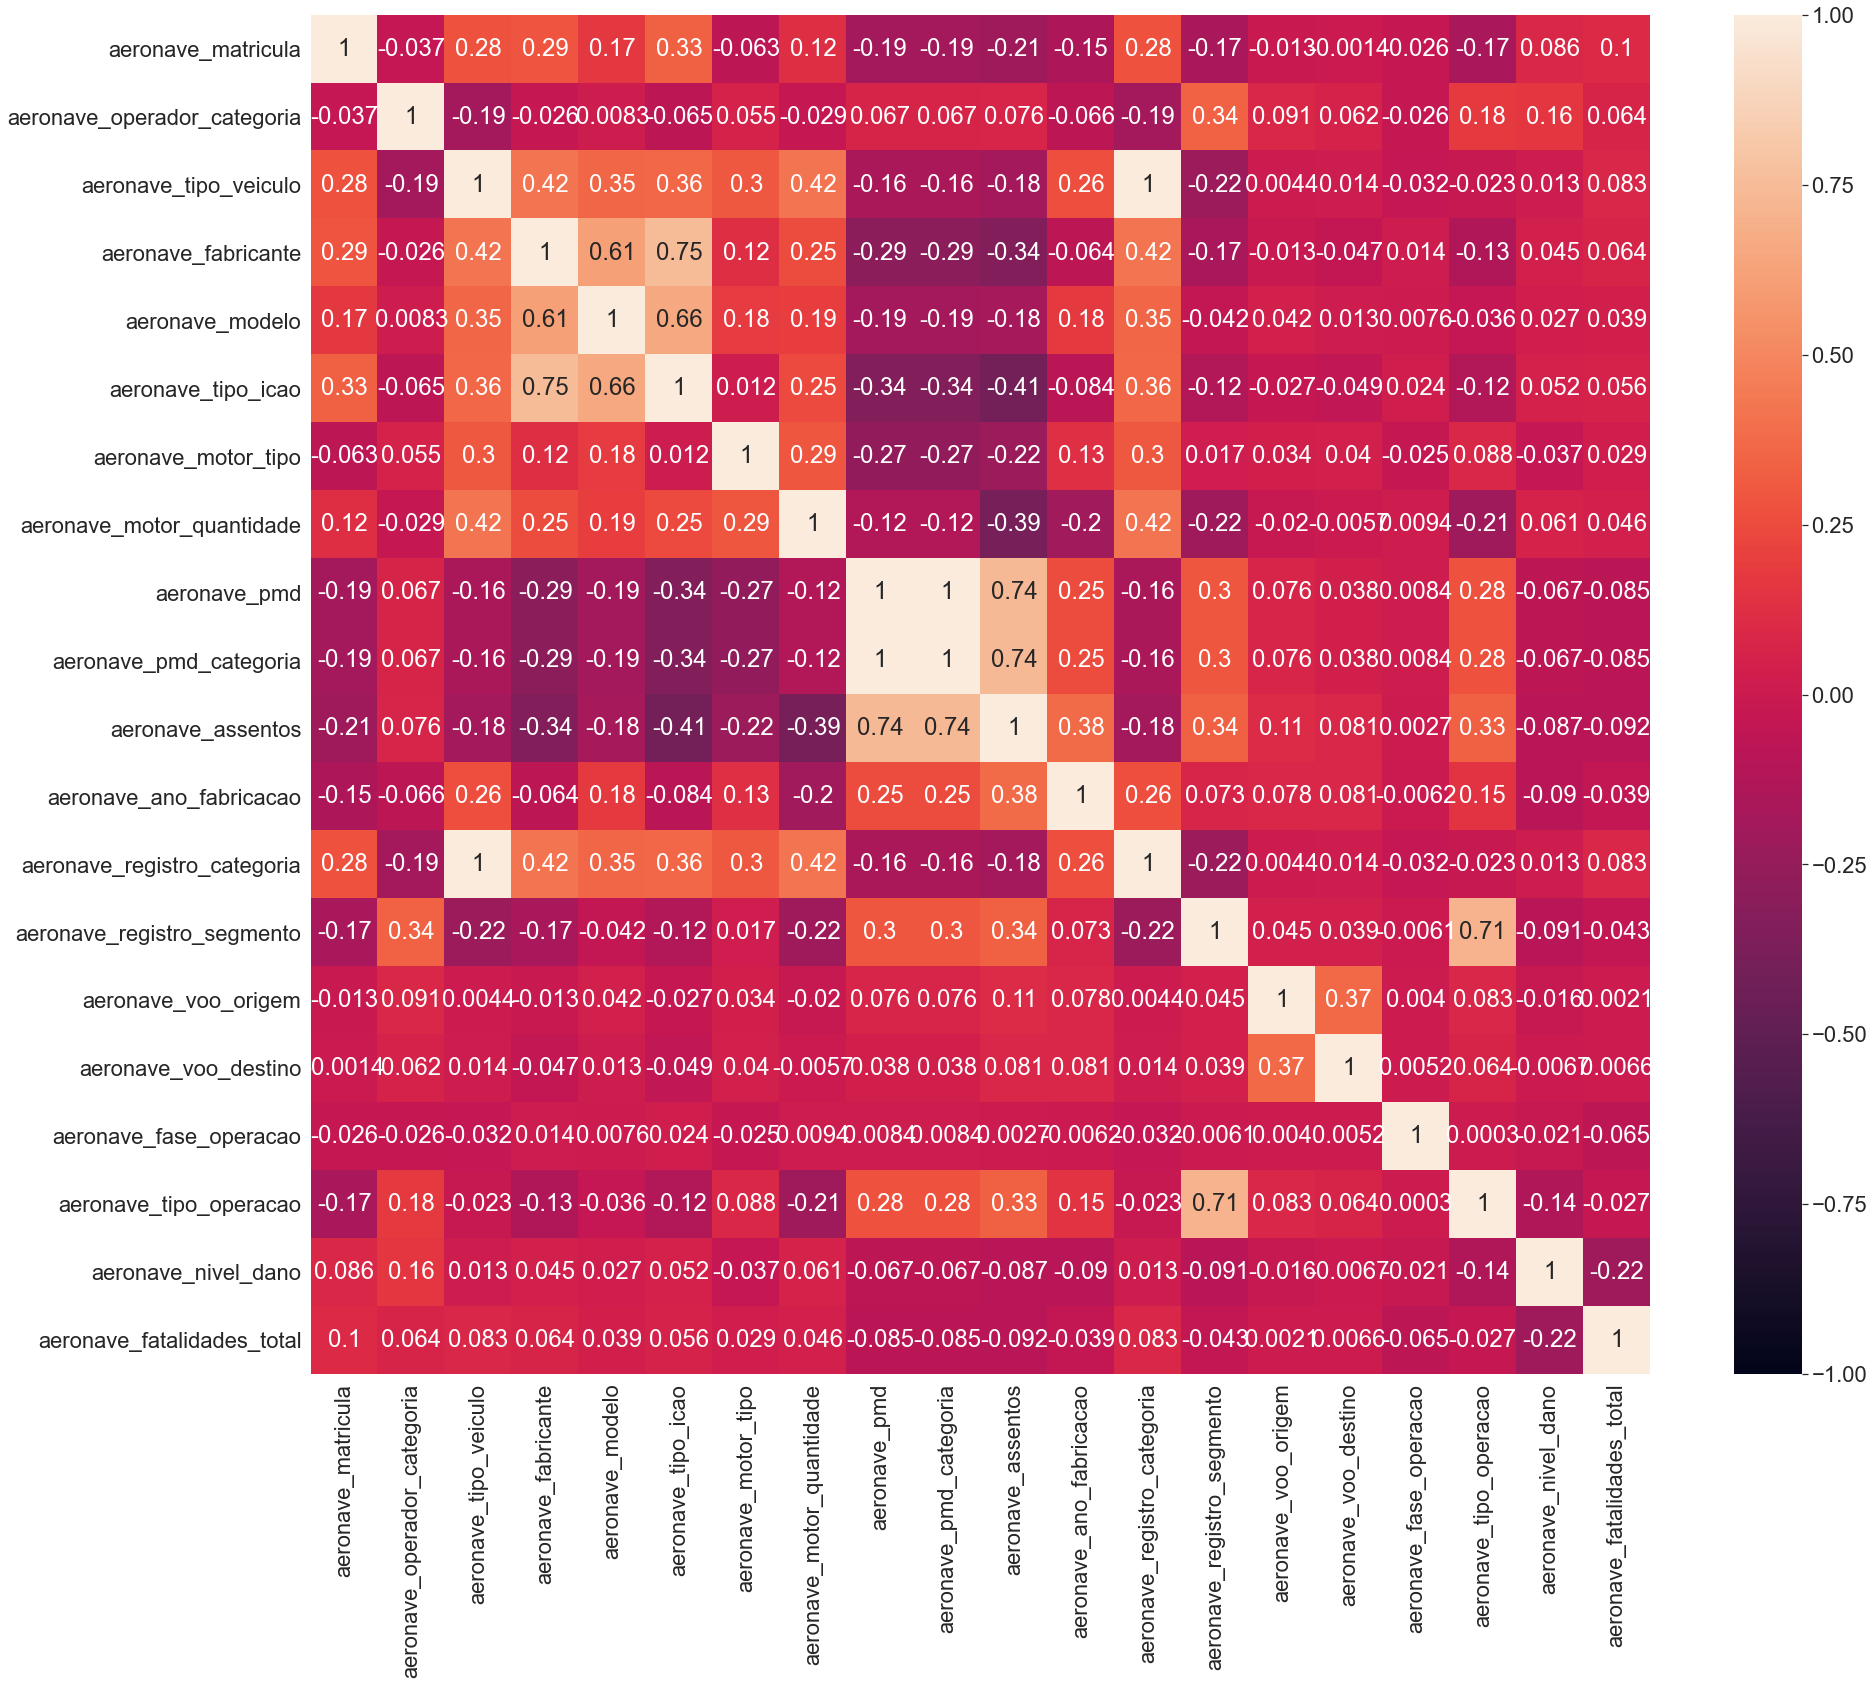

In [31]:
plt.figure(figsize=(30,25))
sns.heatmap(i_aeronave.corr(), vmin=-1, vmax=1, robust=True, annot=True)

## Fatalidades com base no dano

<AxesSubplot:xlabel='aeronave_nivel_dano', ylabel='aeronave_fatalidades_total'>

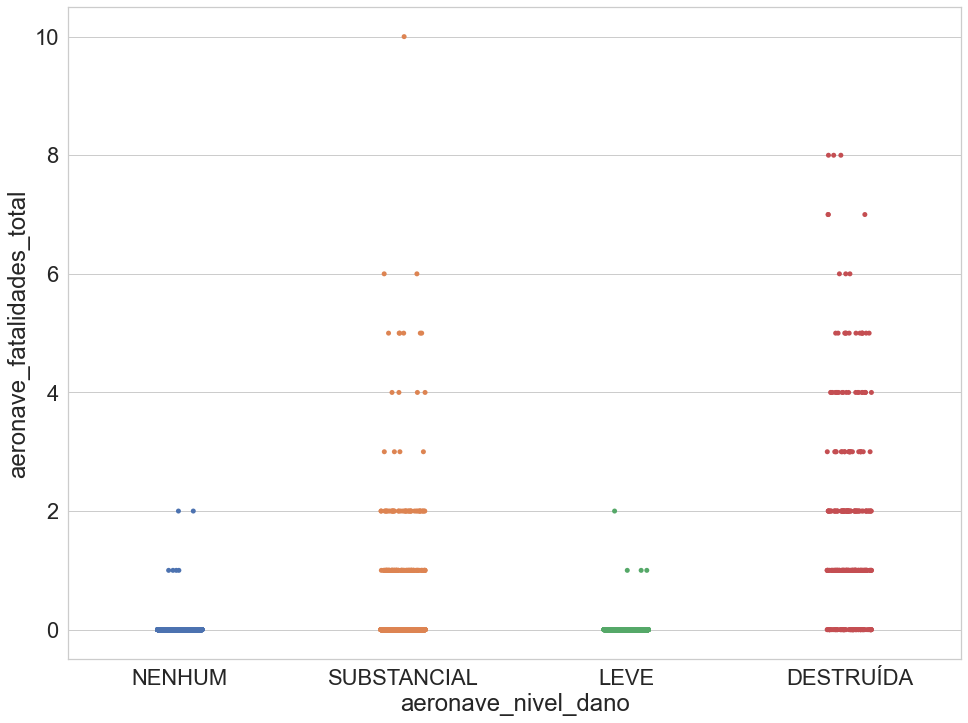

In [32]:
plt.figure(figsize=(16,12))
sns.stripplot(x='aeronave_nivel_dano', y='aeronave_fatalidades_total', data=aeronave_df)

## Countplots e Histogramas
Countplots e histogramas nos ajudam a entender a distribuição dos dados em cada coluna.  
Vamos plotar os principais e mais informativos. Mais countplots podem ser encontrados nos **Profilings**!

### Categorias do Operador da Aeronave com mais ocorrencias

<AxesSubplot:xlabel='aeronave_operador_categoria', ylabel='count'>

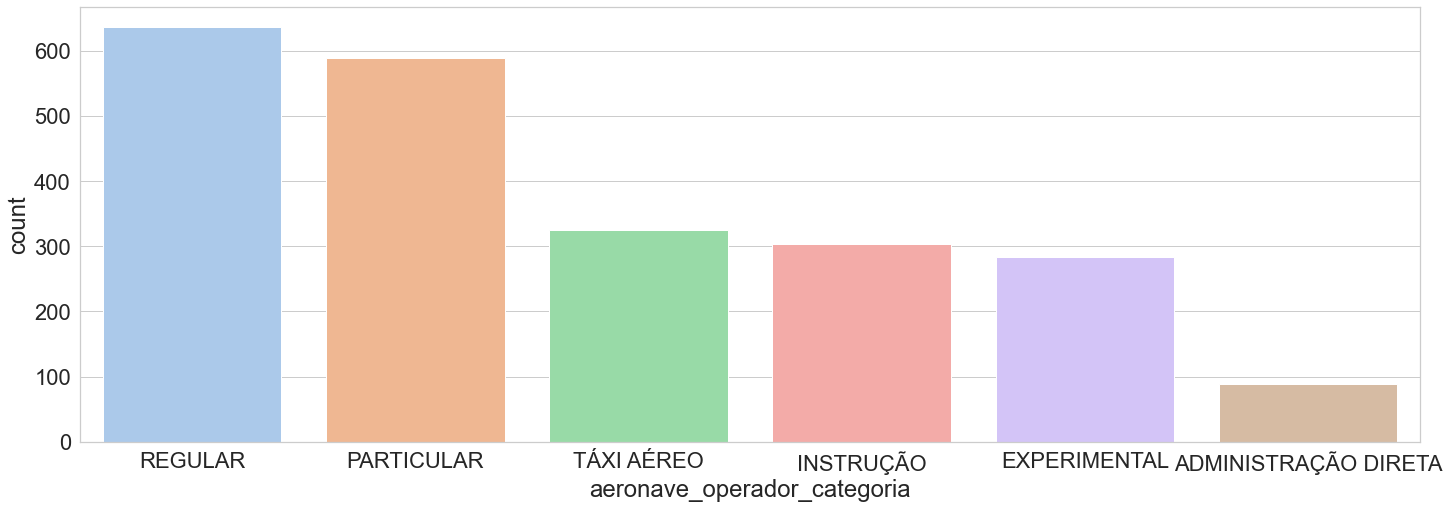

In [33]:
plt.figure(figsize=(24,8))
sns.countplot(data=aeronave_df,
              x='aeronave_operador_categoria',
              order=aeronave_df.aeronave_operador_categoria.value_counts().iloc[:6].index,
              palette='pastel')

### Veículos com mais ocorrencias

<AxesSubplot:xlabel='aeronave_tipo_veiculo', ylabel='count'>

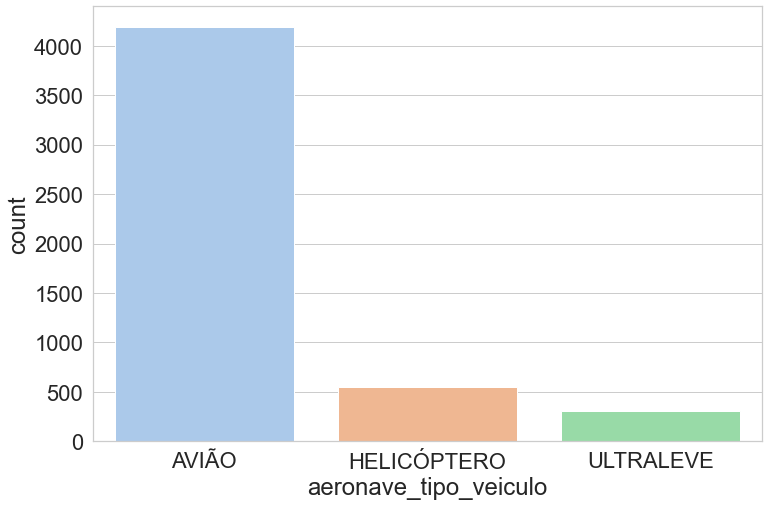

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(data=aeronave_df,
              x='aeronave_tipo_veiculo',
              order=aeronave_df.aeronave_tipo_veiculo.value_counts().iloc[:3].index,
              palette='pastel')

### Modelos com mais ocorrencias

<AxesSubplot:xlabel='aeronave_modelo', ylabel='count'>

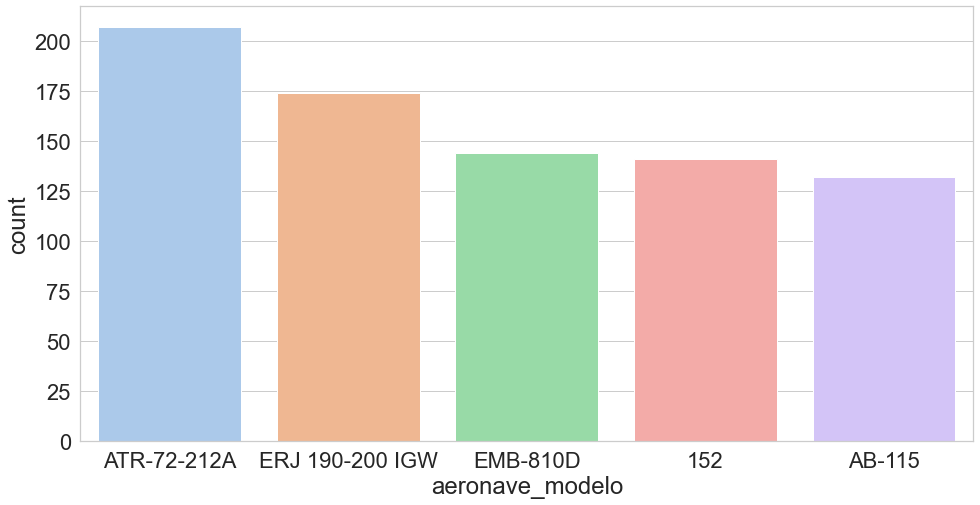

In [35]:
plt.figure(figsize=(16,8))
sns.countplot(data=aeronave_df,
              x='aeronave_modelo',
              order=aeronave_df.aeronave_modelo.value_counts().iloc[:5].index,
              palette='pastel')

### Peso máximo determinado

Aqui, eliminamos outliars, restringindo as aparições no plot a pesos máximos num máximo de 100.000*u*

<AxesSubplot:xlabel='aeronave_pmd_categoria', ylabel='Count'>

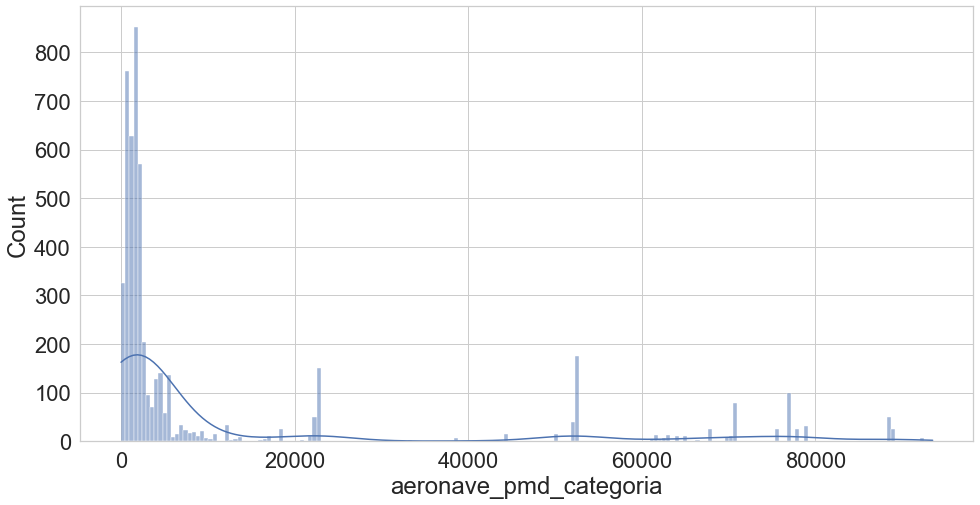

In [36]:
plt.figure(figsize=(16,8))
sns.histplot(aeronave_df[aeronave_df['aeronave_pmd_categoria']<100000]['aeronave_pmd_categoria'], kde=True)

### Assentos na aeronave

<AxesSubplot:xlabel='aeronave_assentos', ylabel='Count'>

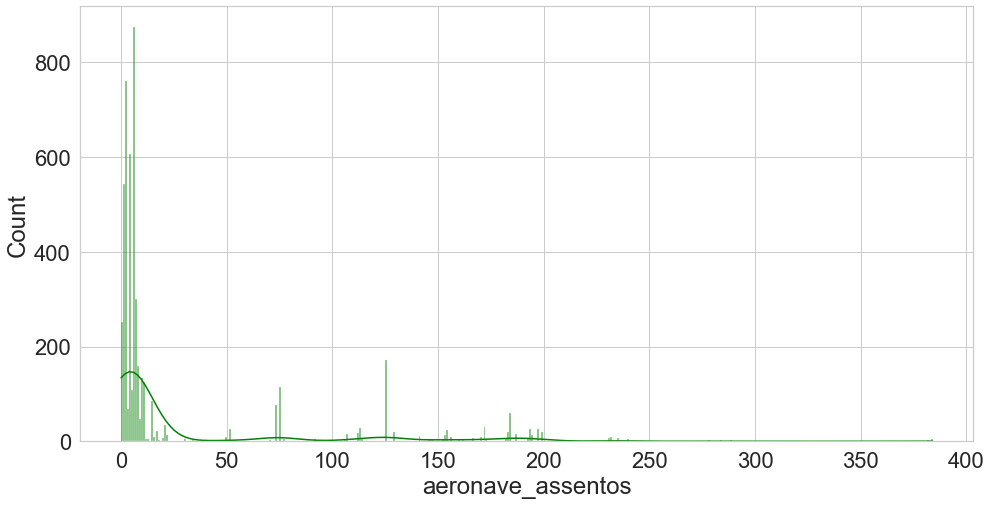

In [37]:
plt.figure(figsize=(16,8))
sns.histplot(aeronave_df['aeronave_assentos'], kde=True, color='green')

### Ano de fabricação

<AxesSubplot:xlabel='aeronave_ano_fabricacao', ylabel='Count'>

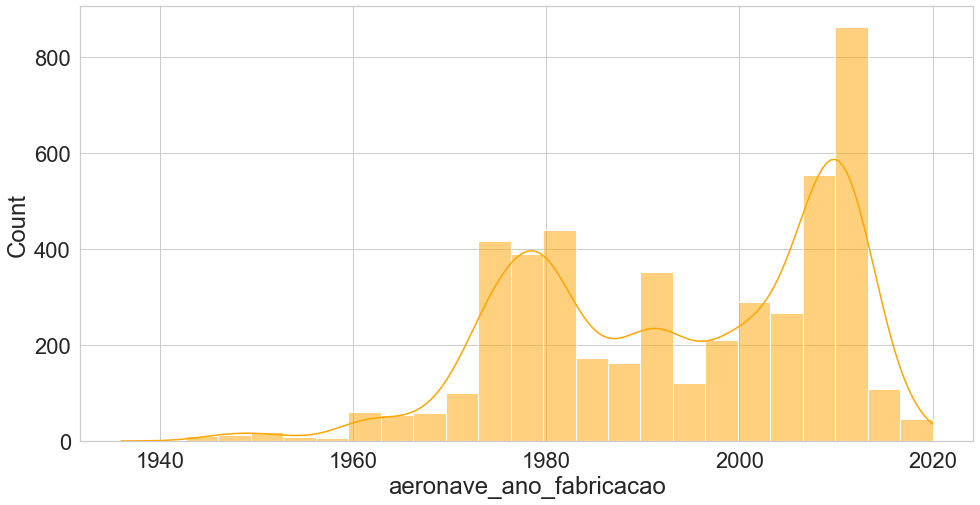

In [38]:
plt.figure(figsize=(16,8))
sns.histplot(aeronave_df['aeronave_ano_fabricacao'], kde=True, color='orange')

### Fase da operação

<AxesSubplot:xlabel='aeronave_fase_operacao', ylabel='count'>

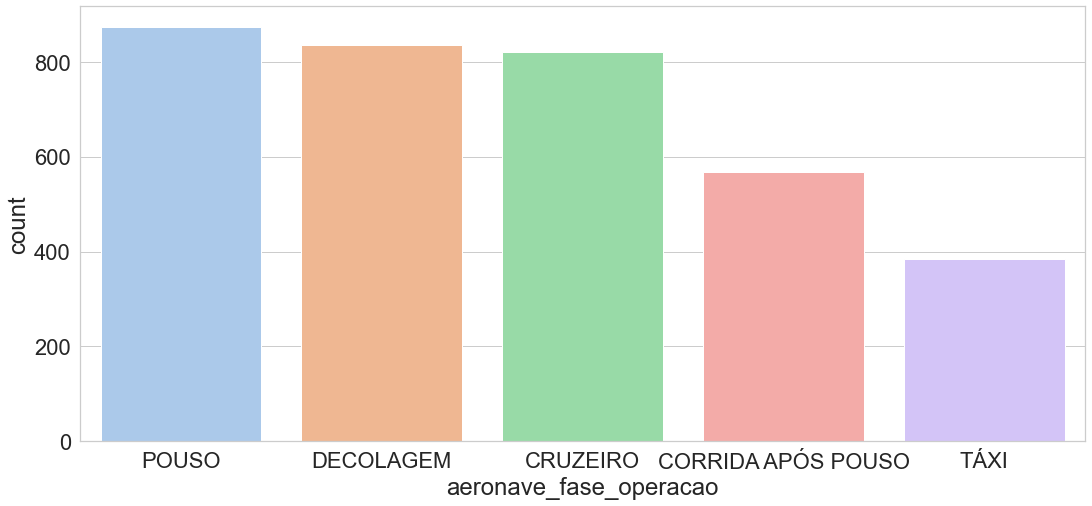

In [39]:
plt.figure(figsize=(18,8))
sns.countplot(data=aeronave_df,
              x='aeronave_fase_operacao',
              order=aeronave_df.aeronave_fase_operacao.value_counts().iloc[:5].index,
              palette='pastel')

### Nível do dano

<AxesSubplot:xlabel='aeronave_nivel_dano', ylabel='count'>

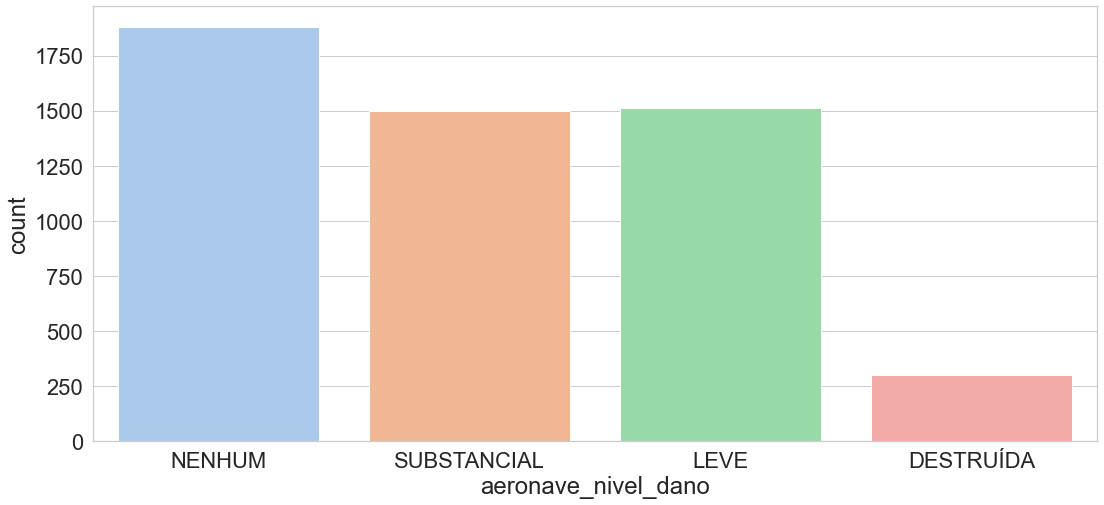

In [40]:
plt.figure(figsize=(18,8))
sns.countplot(data=aeronave_df,
              x='aeronave_nivel_dano',
              palette='pastel')

### Número total de fatalidades

<AxesSubplot:xlabel='aeronave_fatalidades_total', ylabel='Count'>

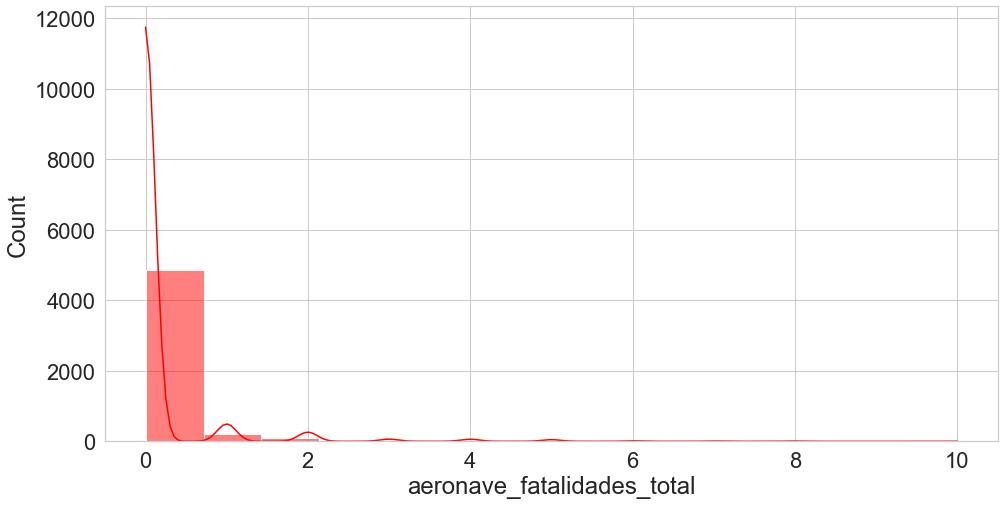

In [41]:
plt.figure(figsize=(16,8))
sns.histplot(aeronave_df['aeronave_fatalidades_total'], kde=True, color='red')

# Fator contribuinte

Ajustando valores das colunas para análise, aqui, não temos interesse de fazer plots numéricos.

In [42]:
fator_contribuinte_df = fator_contribuinte_df.drop(columns=['codigo_ocorrencia3'])

## Countplots e Histogramas
Countplots e histogramas nos ajudam a entender a distribuição dos dados em cada coluna.  
Vamos plotar os principais e mais informativos. Mais countplots podem ser encontrados nos **Profilings**!

### Fatores mais presentes

<AxesSubplot:xlabel='fator_nome', ylabel='count'>

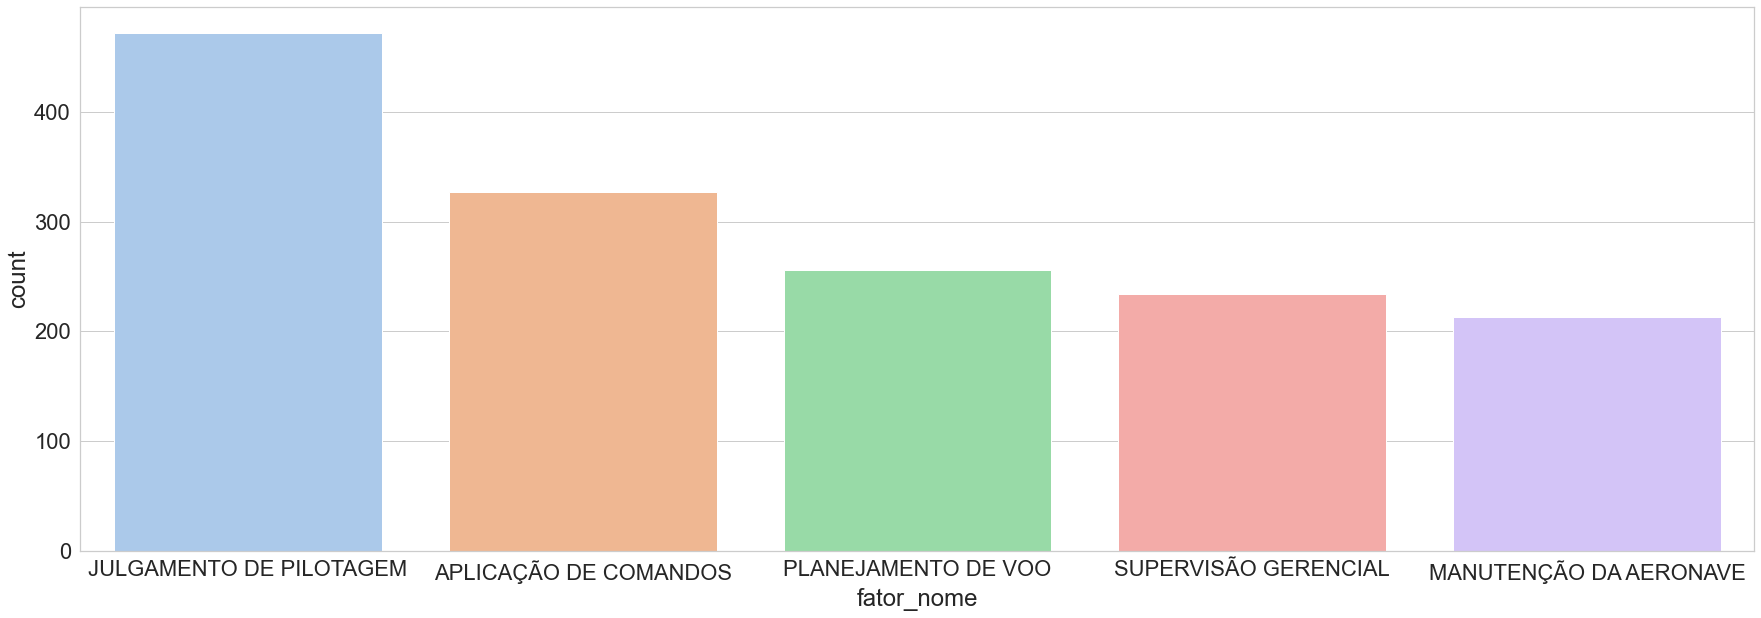

In [43]:
plt.figure(figsize=(30,10))
sns.countplot(data=fator_contribuinte_df,
              x='fator_nome',
              order=fator_contribuinte_df.fator_nome.value_counts().iloc[:5].index,
              palette='pastel')

### Aspectos mais presentes

<AxesSubplot:xlabel='fator_aspecto', ylabel='count'>

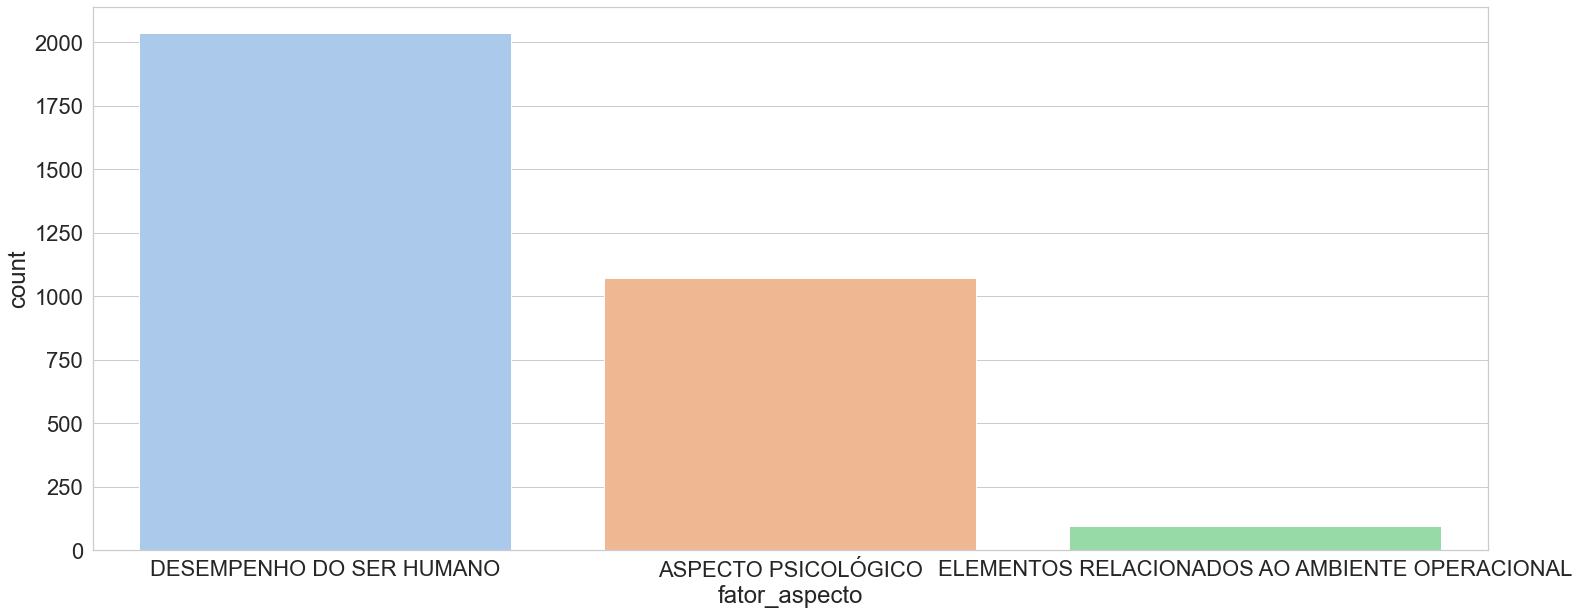

In [44]:
plt.figure(figsize=(25,10))
sns.countplot(data=fator_contribuinte_df,
              x='fator_aspecto',
              order=fator_contribuinte_df.fator_aspecto.value_counts().iloc[:3].index,
              palette='pastel')

### Fatores condicionantes mais presentes

<AxesSubplot:xlabel='fator_condicionante', ylabel='count'>

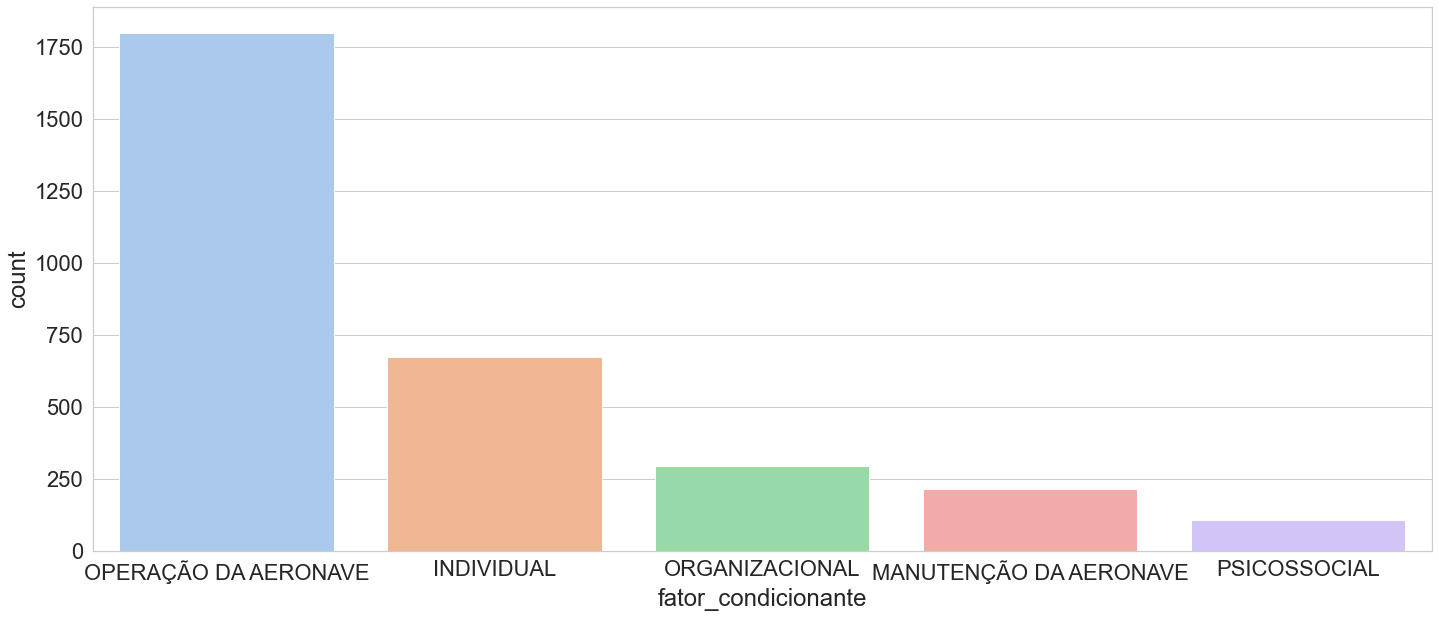

In [45]:
plt.figure(figsize=(24,10))
sns.countplot(data=fator_contribuinte_df,
              x='fator_condicionante',
              order=fator_contribuinte_df.fator_condicionante.value_counts().iloc[:5].index,
              palette='pastel')

### Área do fator

<AxesSubplot:xlabel='fator_area', ylabel='count'>

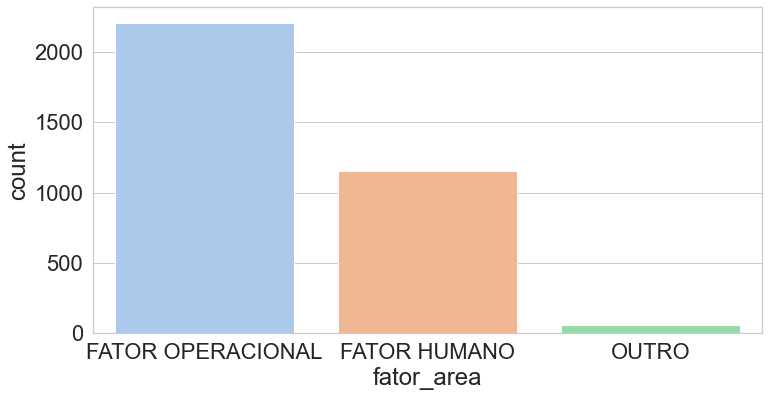

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(data=fator_contribuinte_df,
              x='fator_area',
              order=fator_contribuinte_df.fator_area.value_counts().iloc[:3].index,
              palette='pastel')

# Recomendação

Ajustando valores das colunas para análise, aqui também não temos interesse de fazer plots numéricos.

In [47]:
recomendacao_df = recomendacao_df.drop(columns=['codigo_ocorrencia4'])

## Countplots e Histogramas
Countplots e histogramas nos ajudam a entender a distribuição dos dados em cada coluna.  
Vamos plotar os principais e mais informativos. Mais countplots podem ser encontrados nos **Profilings**!

<AxesSubplot:xlabel='recomendacao_dias_para_feedback', ylabel='Count'>

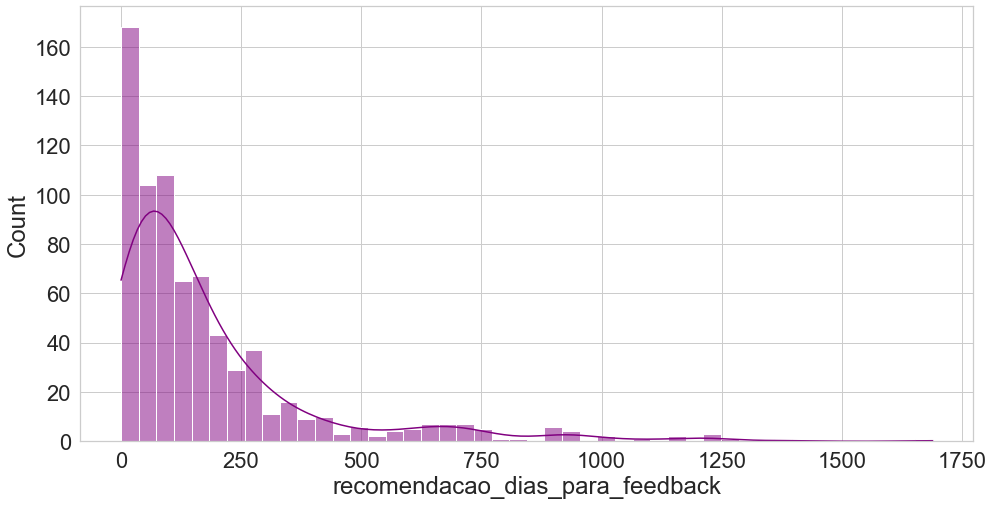

In [48]:
plt.figure(figsize=(16,8))
sns.histplot(recomendacao_df['recomendacao_dias_para_feedback'], kde=True, color='purple')

<AxesSubplot:xlabel='recomendacao_status', ylabel='count'>

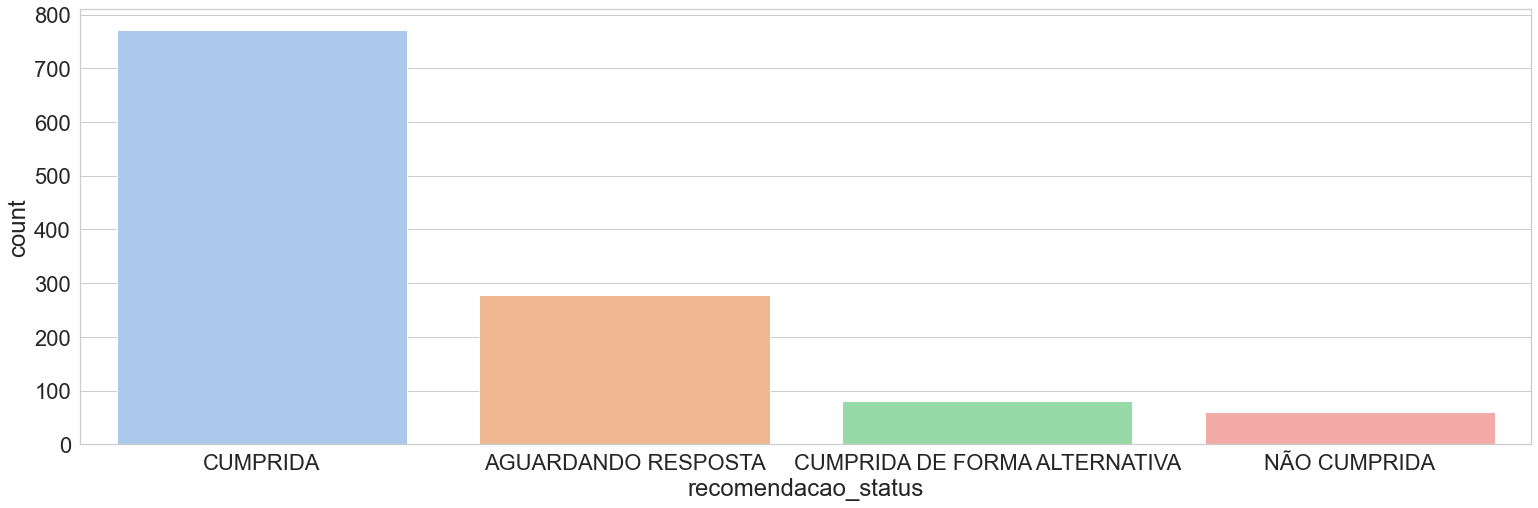

In [49]:
plt.figure(figsize=(26,8))
sns.countplot(data=recomendacao_df,
              x='recomendacao_status',
              palette='pastel')

# CENIPA1

## Matriz de correlação

In [50]:
i_cenipa1 = cenipa1.apply(make_int, axis=0) # DF com valores numéricos apenas

<AxesSubplot:>

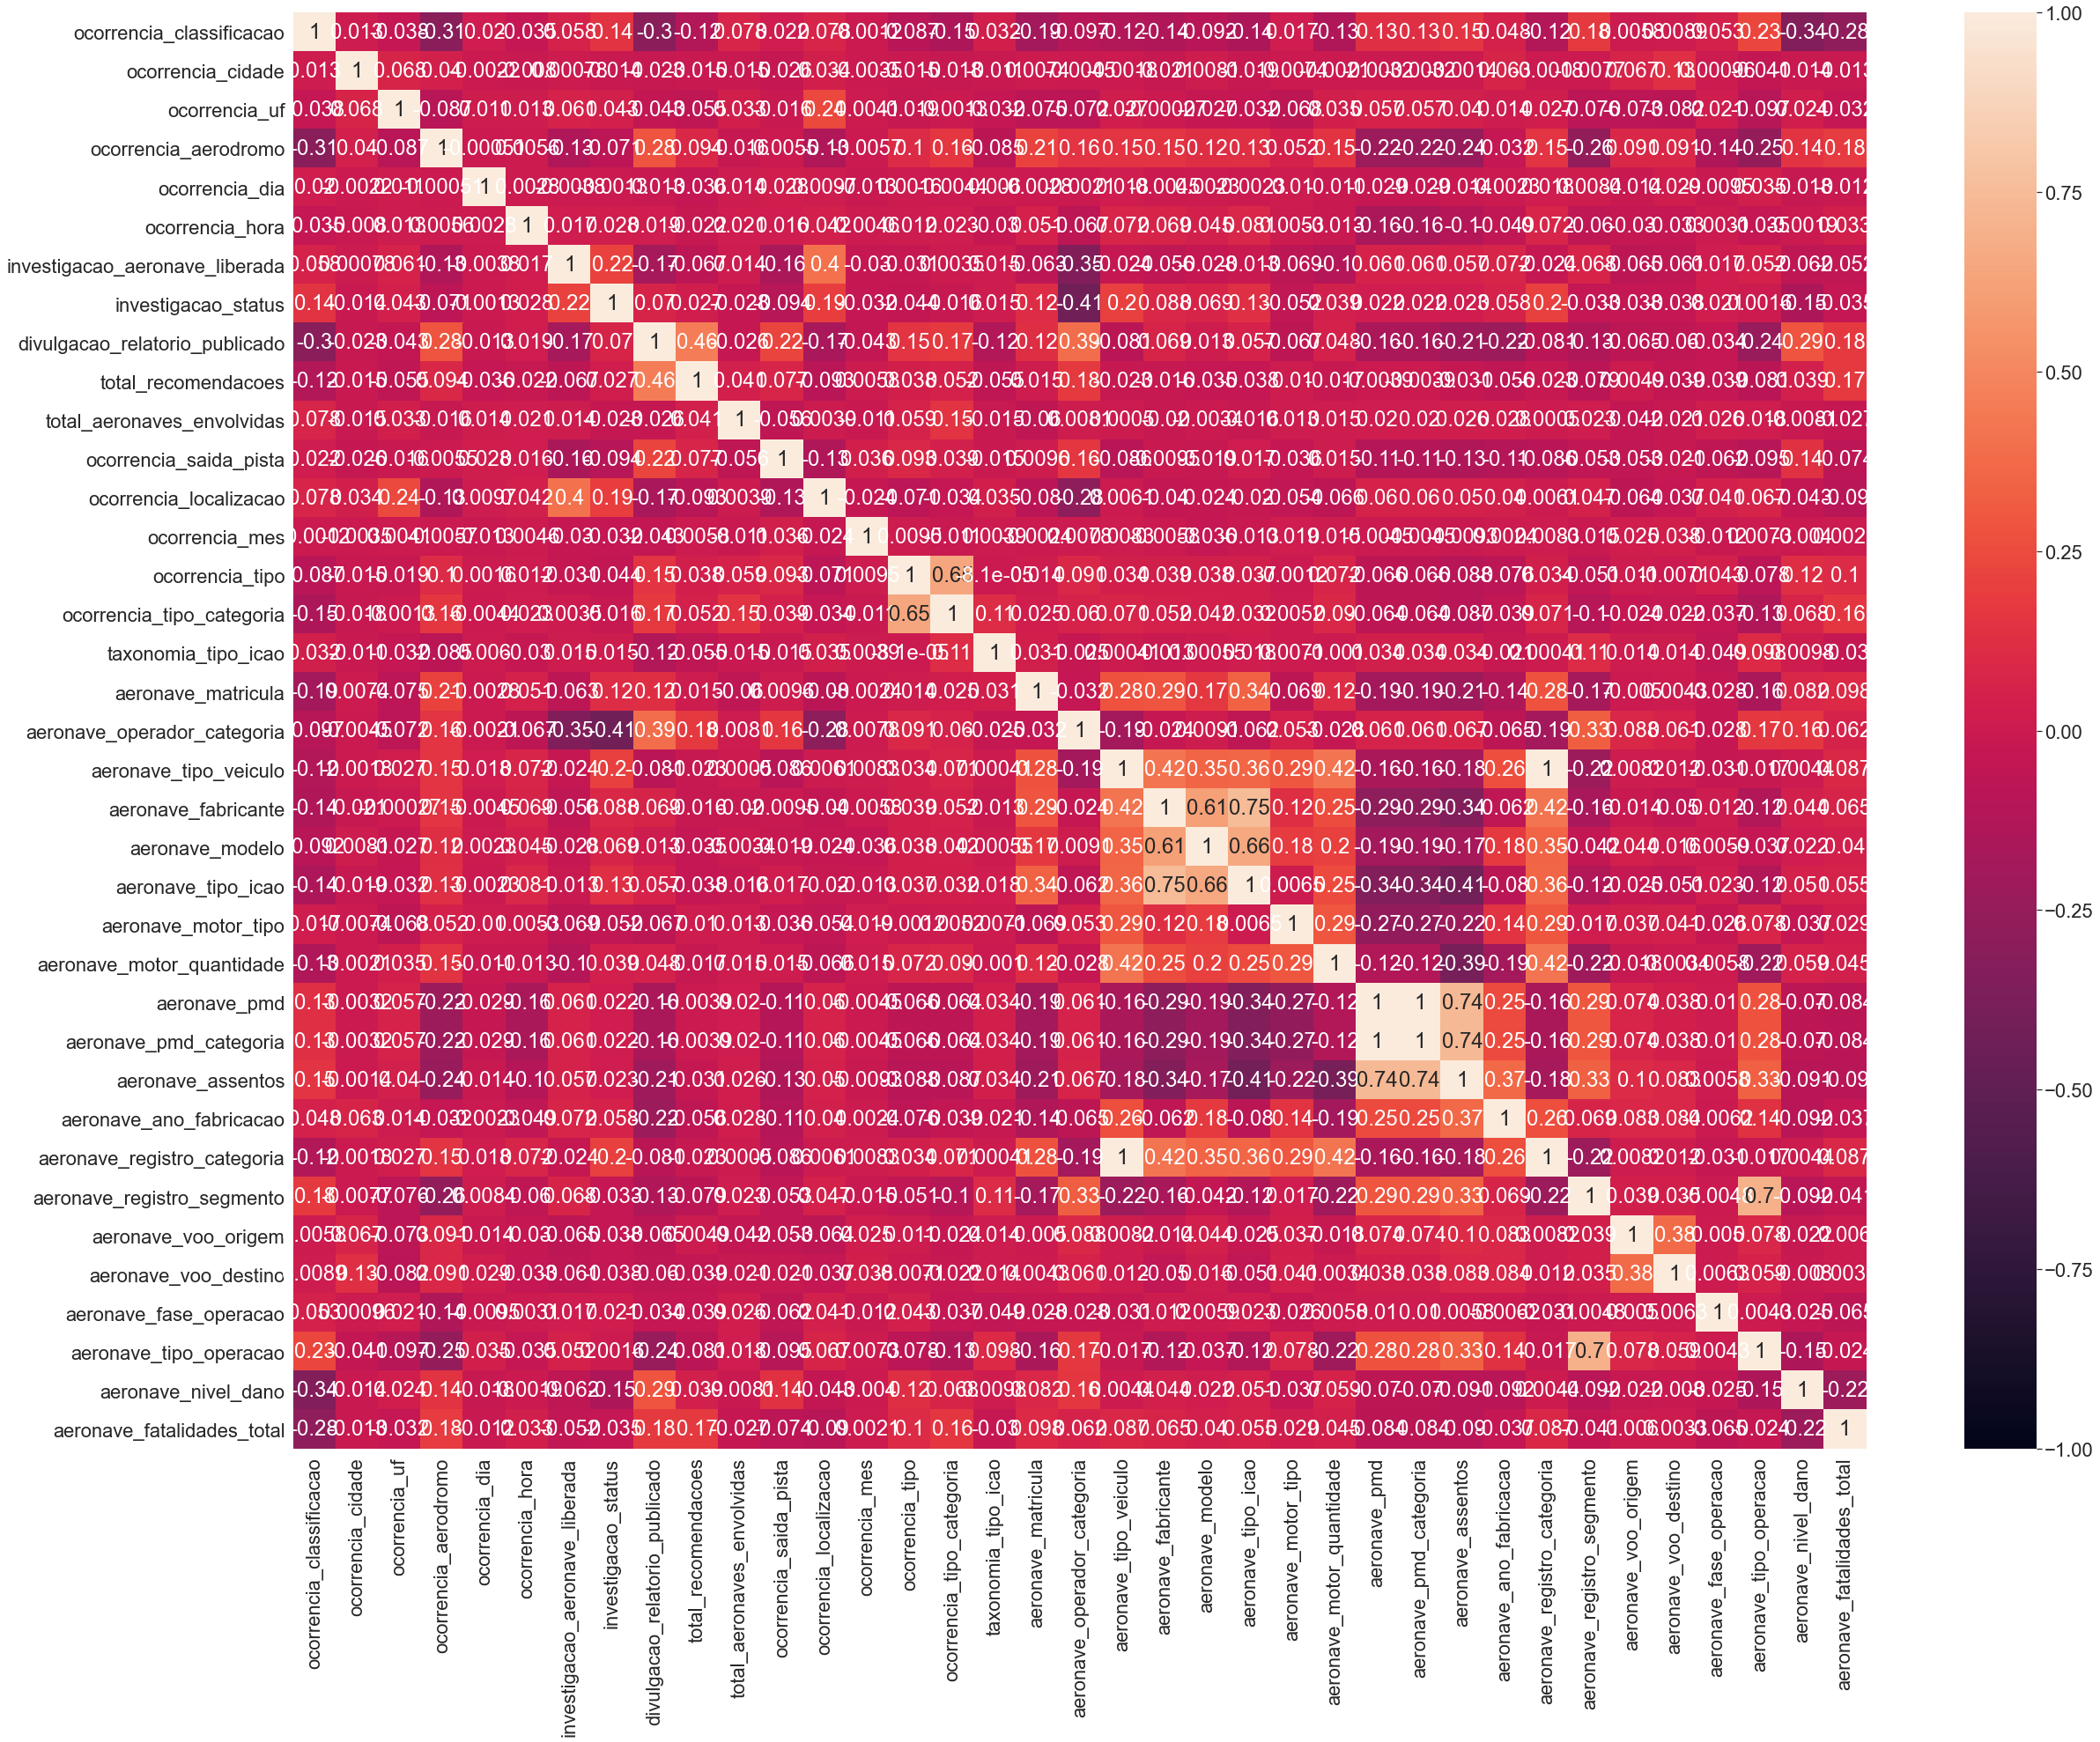

In [51]:
plt.figure(figsize=(40,30))
sns.heatmap(i_cenipa1.corr(), vmin=-1, vmax=1, robust=True, annot=True)

## Relacionando o nível de dano com a classificação do acidente

Text(0, 0.5, 'Quantidade de ocorrências')

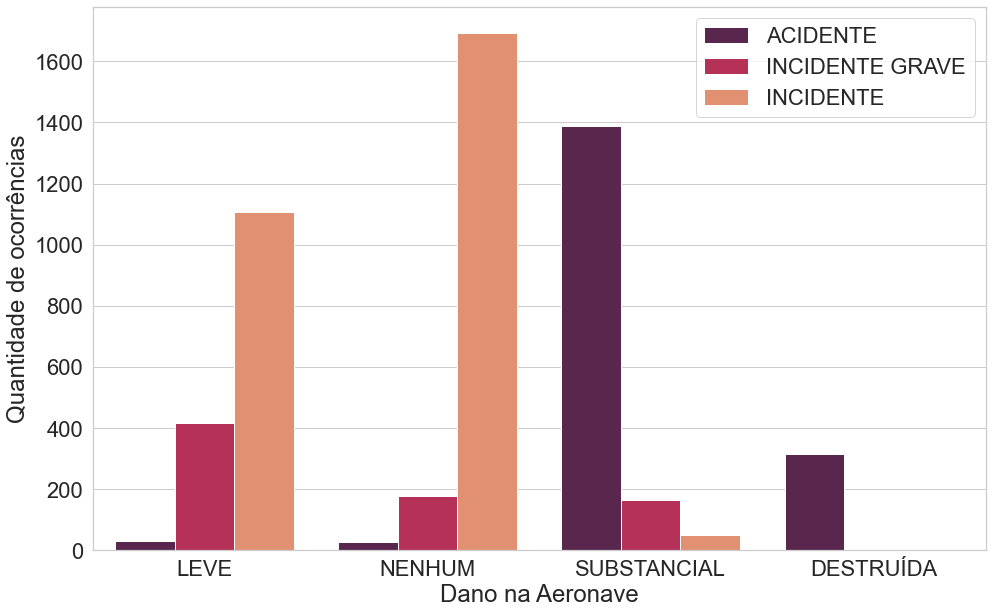

In [52]:
plt.figure(figsize=(16,10))
sns.set(font_scale=2)
sns.set_style('whitegrid')
sns.countplot(data=cenipa1,
             hue='ocorrencia_classificacao', 
             x='aeronave_nivel_dano', 
             palette='rocket',
             hue_order=['ACIDENTE',
                       'INCIDENTE GRAVE',
                       'INCIDENTE'])
plt.legend(loc='upper right')
plt.xlabel('Dano na Aeronave')
plt.ylabel('Quantidade de ocorrências')

## Relacionando a quantidade de mortes com a classificação do acidente

**IMPORTANTE**: Temos variedade de fatalidades apenas em casos de ACIDENTE. O warning é devido a isso.

C:\Users\Pedro\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\Pedro\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



<AxesSubplot:xlabel='aeronave_fatalidades_total', ylabel='Density'>

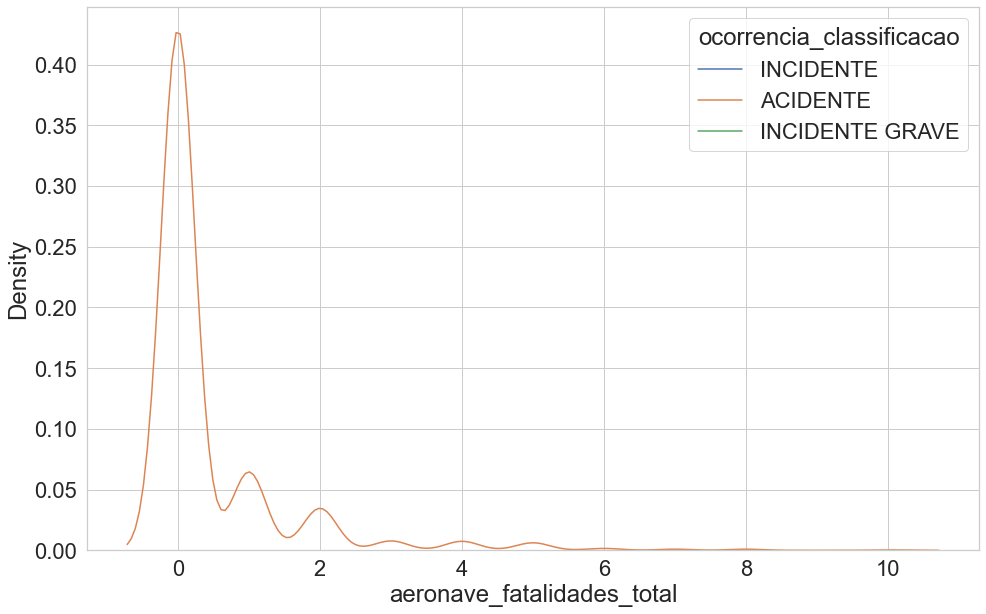

In [53]:
plt.figure(figsize=(16,10))
sns.kdeplot(data=cenipa1, 
             x='aeronave_fatalidades_total',
             hue='ocorrencia_classificacao')